<a href="https://colab.research.google.com/github/TheAmirHK/ReinforcementLearning_projects/blob/main/Tom%26Jerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.1 MB/s eta 0:00:00


In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from gymnasium import Env, spaces

class HunterEnv(Env):
    def __init__(self, maze, mouse_start, cat_start):
        super(HunterEnv, self).__init__()
        self.maze = np.array(maze)
        self.mouse_position = mouse_start
        self.cat_position = cat_start
        self.mouse_start = mouse_start
        self.cat_start = cat_start
        self.rows, self.cols = self.maze.shape

        self.action_space = spaces.Discrete(4)

        self.observation_space = spaces.Box(low=0, high=max(self.rows, self.cols), shape=(4,), dtype=np.int32)

    def reset(self):
        self.mouse_position = self.mouse_start
        self.cat_position = self.cat_start
        return self._get_state()

    def _get_state(self):
        return np.array([*self.mouse_position, *self.cat_position], dtype=np.int32)

    def _is_valid(self, position):
        row, col = position
        return 0 <= row < self.rows and 0 <= col < self.cols and self.maze[row, col] == 0

    def step(self, mouse_action, cat_action):
        moves = {
            0: (-1, 0),
            1: (1, 0),
            2: (0, -1),
            3: (0, 1)
        }

        mouse_move = moves[mouse_action]
        new_mouse_position = (self.mouse_position[0] + mouse_move[0], self.mouse_position[1] + mouse_move[1])
        if self._is_valid(new_mouse_position):
            self.mouse_position = new_mouse_position

        cat_move = moves[cat_action]
        new_cat_position = (self.cat_position[0] + cat_move[0], self.cat_position[1] + cat_move[1])
        if self._is_valid(new_cat_position):
            self.cat_position = new_cat_position

        done = self.mouse_position == self.cat_position
        reward = -1 if done else 1

        return self._get_state(), reward, done, {}

    def render(self):
        maze_copy = self.maze.copy()
        maze_copy[self.mouse_position] = 2
        maze_copy[self.cat_position] = 3
        plt.figure(figsize=(6, 6))
        plt.imshow(maze_copy, cmap="coolwarm", origin="upper")
        plt.title("Tom (red) vs. Jerry (pink brown whatever)")
        plt.axis("off")
        plt.show()


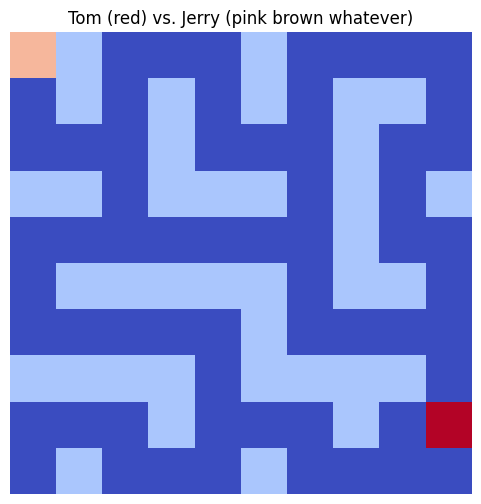

State: [0 0 8 9], Reward: 1


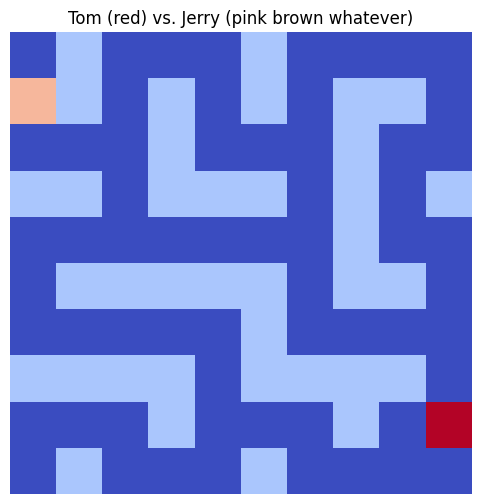

State: [1 0 8 9], Reward: 1


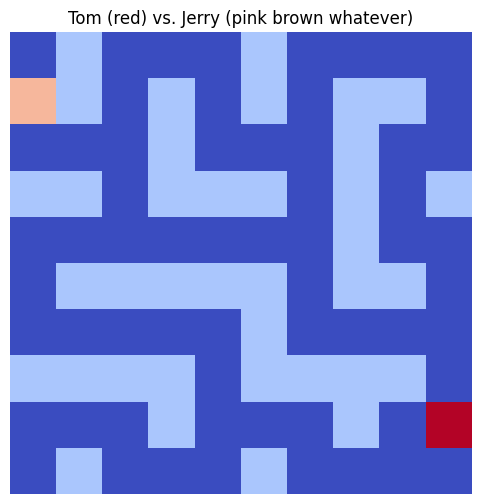

State: [1 0 8 9], Reward: 1


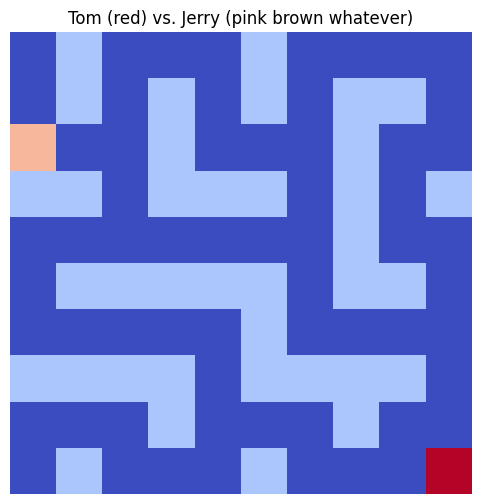

State: [2 0 9 9], Reward: 1


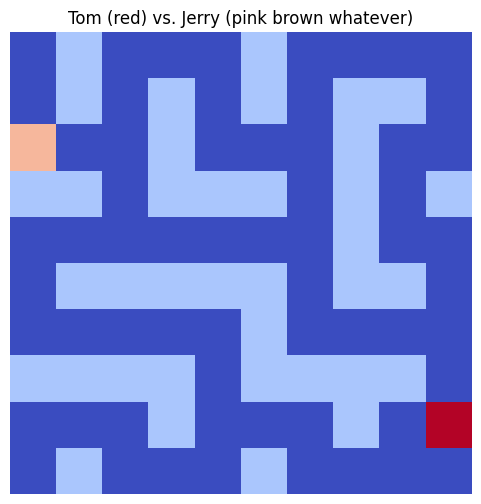

State: [2 0 8 9], Reward: 1


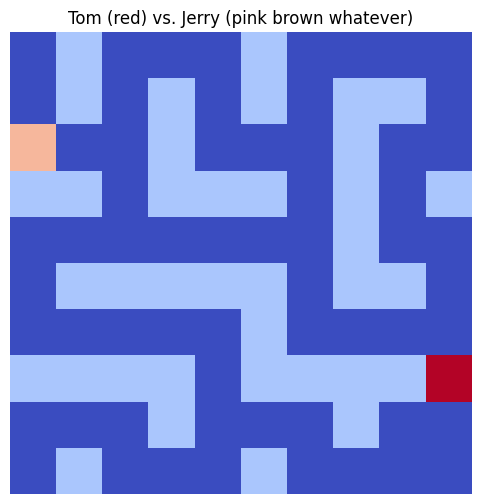

State: [2 0 7 9], Reward: 1


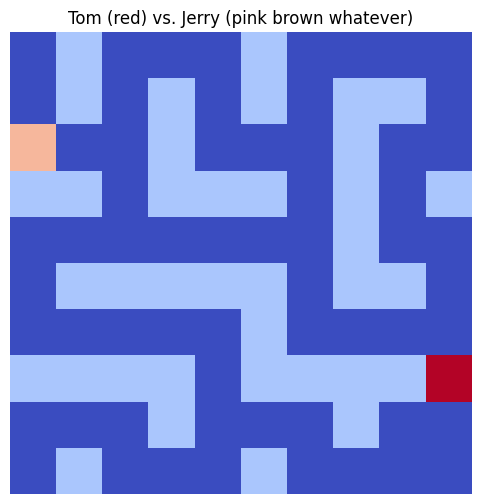

State: [2 0 7 9], Reward: 1


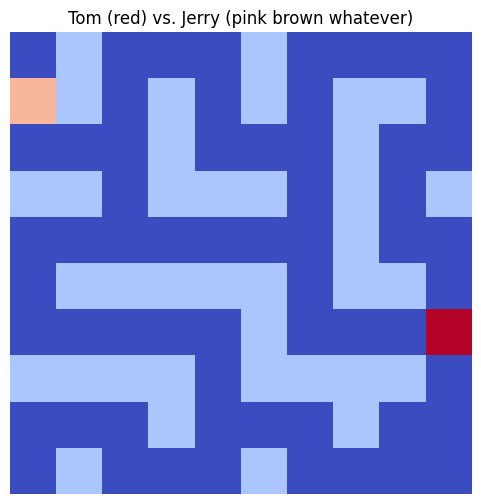

State: [1 0 6 9], Reward: 1


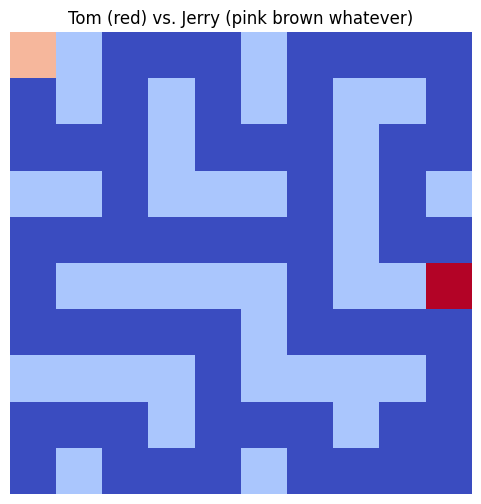

State: [0 0 5 9], Reward: 1


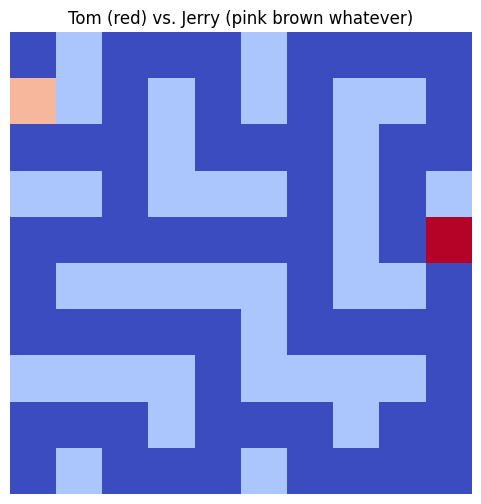

State: [1 0 4 9], Reward: 1


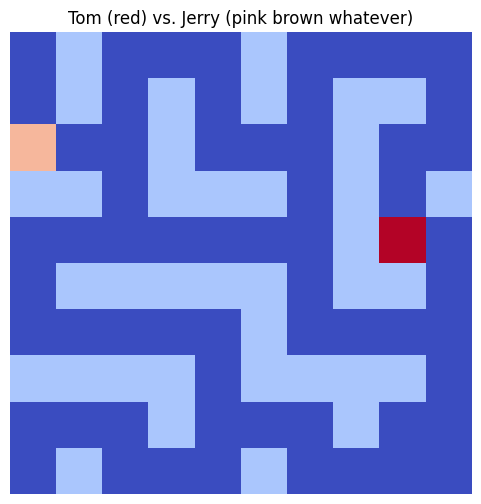

State: [2 0 4 8], Reward: 1


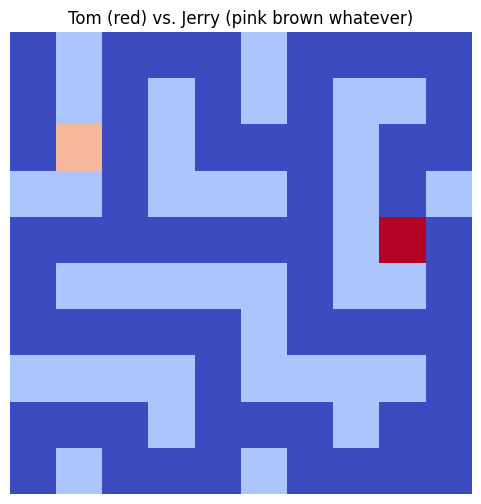

State: [2 1 4 8], Reward: 1


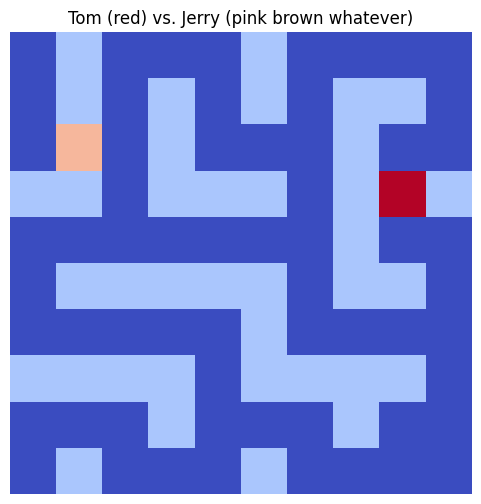

State: [2 1 3 8], Reward: 1


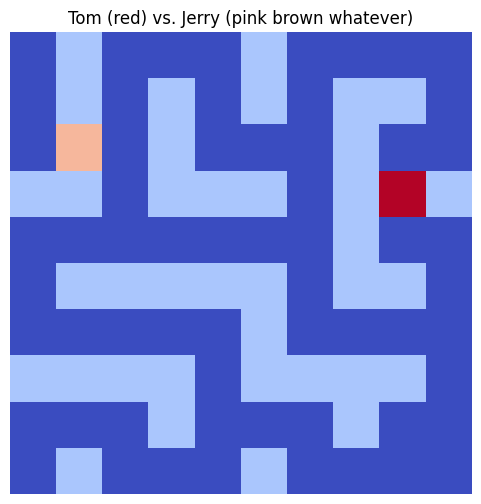

State: [2 1 3 8], Reward: 1


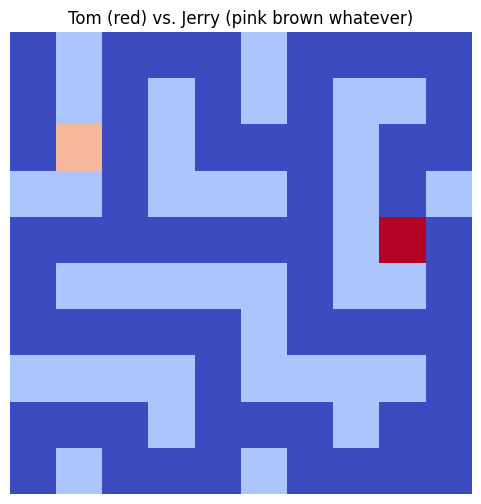

State: [2 1 4 8], Reward: 1


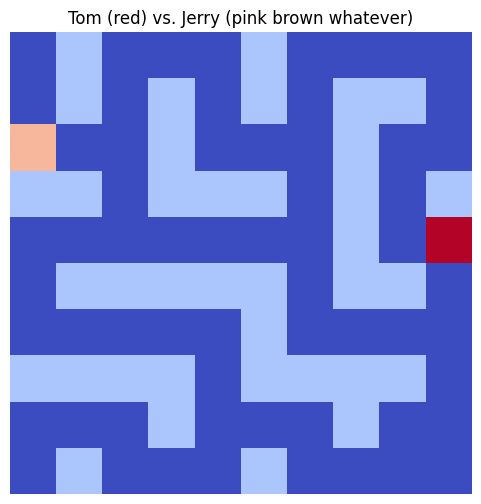

State: [2 0 4 9], Reward: 1


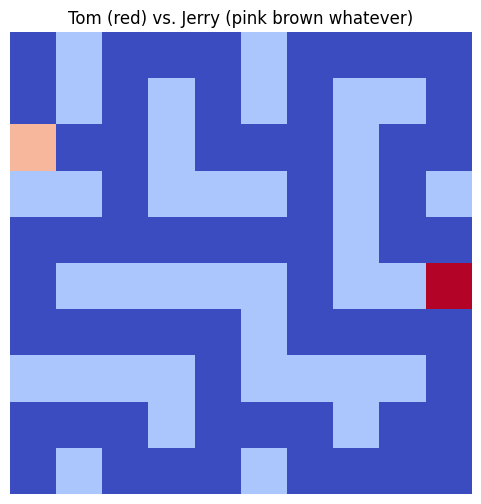

State: [2 0 5 9], Reward: 1


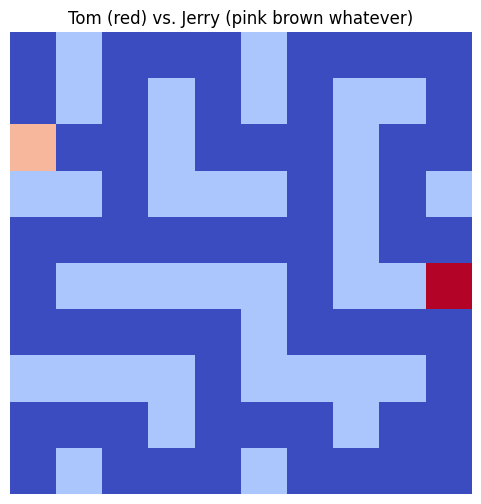

State: [2 0 5 9], Reward: 1


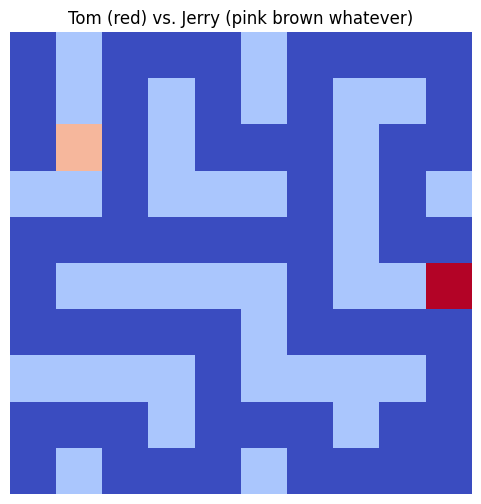

State: [2 1 5 9], Reward: 1


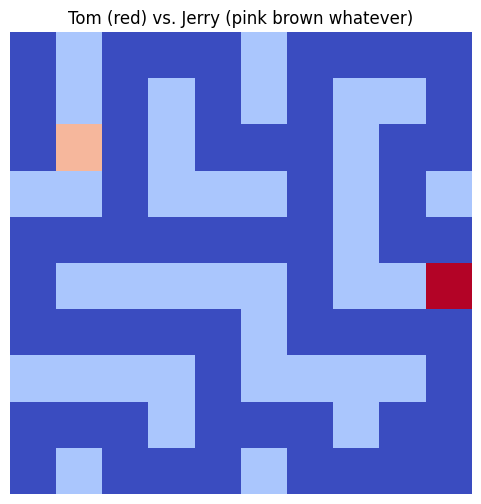

State: [2 1 5 9], Reward: 1


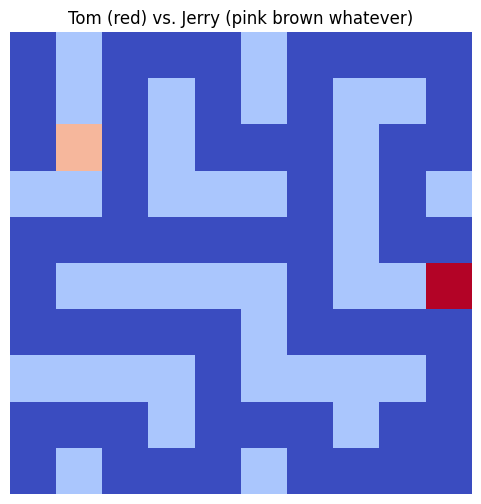

State: [2 1 5 9], Reward: 1


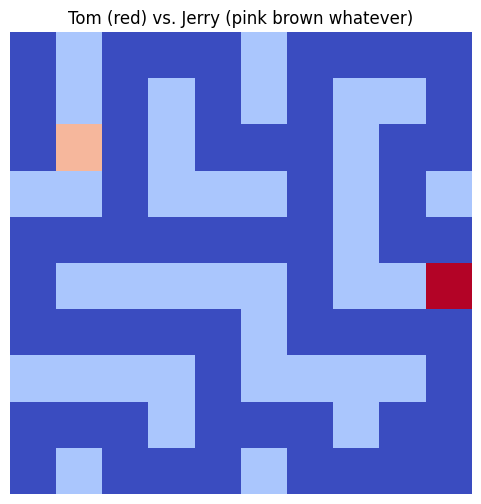

State: [2 1 5 9], Reward: 1


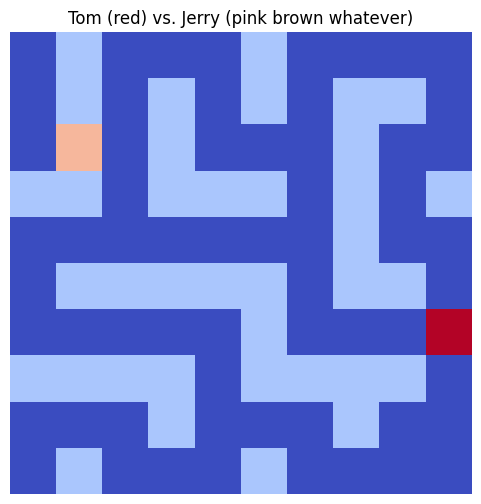

State: [2 1 6 9], Reward: 1


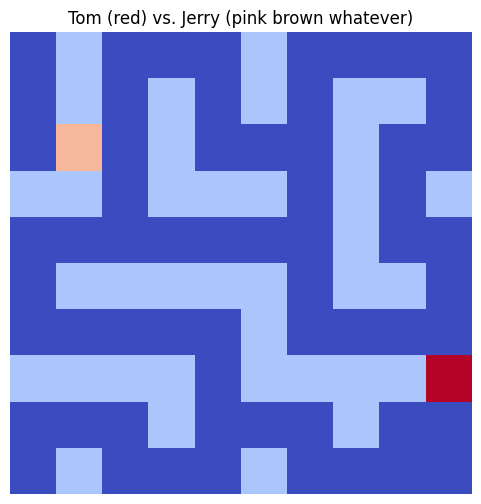

State: [2 1 7 9], Reward: 1


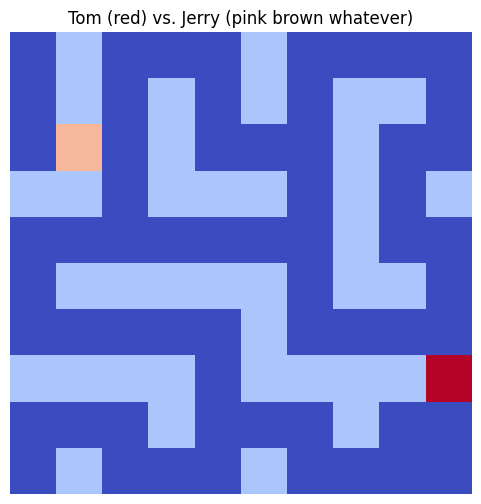

State: [2 1 7 9], Reward: 1


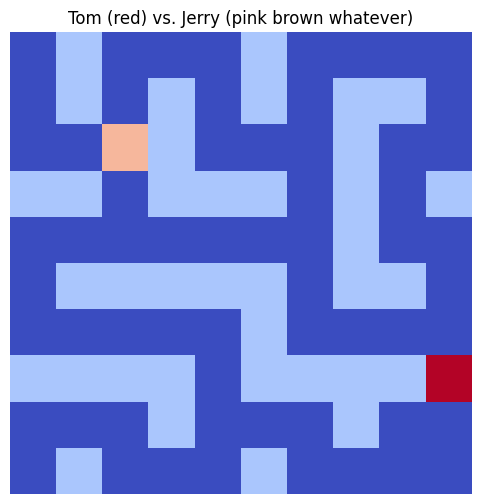

State: [2 2 7 9], Reward: 1


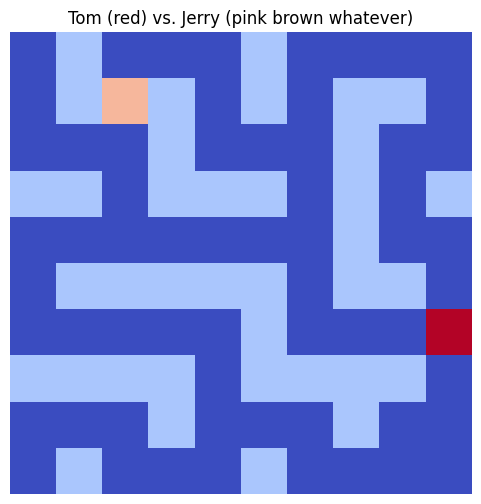

State: [1 2 6 9], Reward: 1


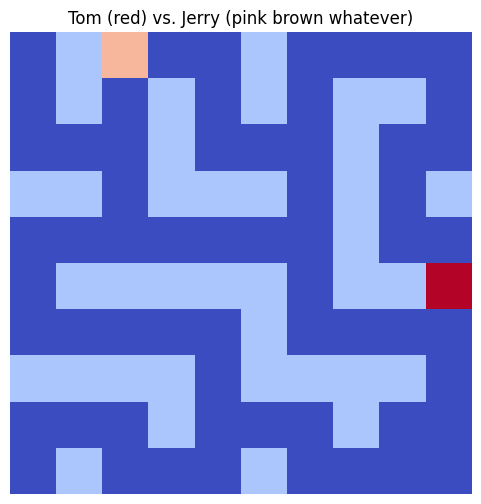

State: [0 2 5 9], Reward: 1


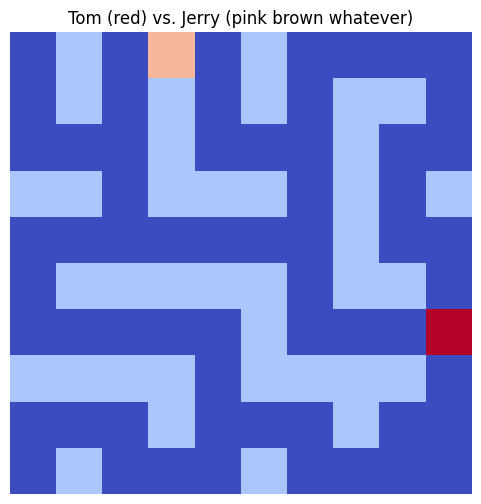

State: [0 3 6 9], Reward: 1


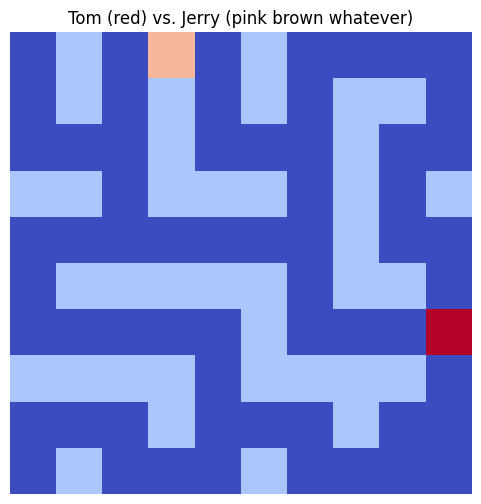

State: [0 3 6 9], Reward: 1


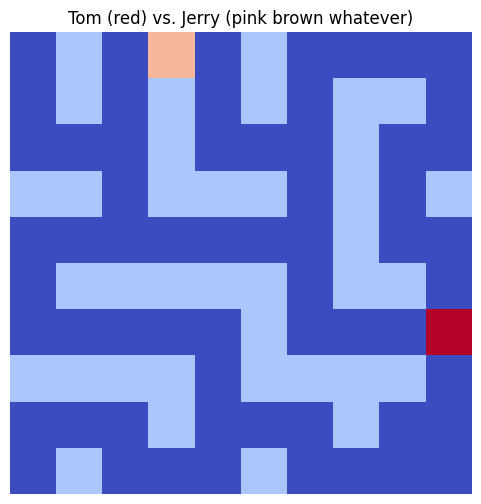

State: [0 3 6 9], Reward: 1


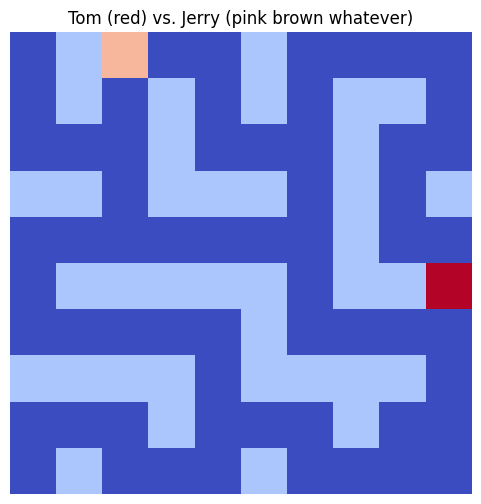

State: [0 2 5 9], Reward: 1


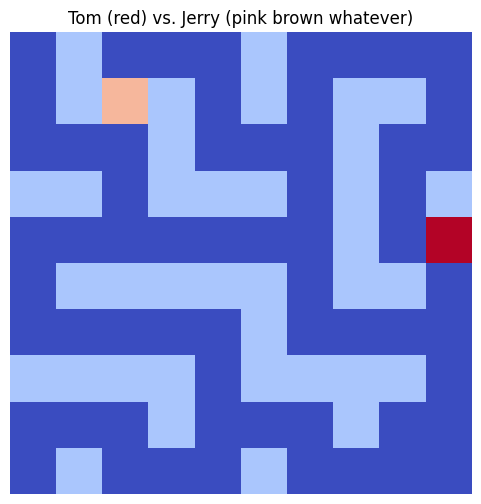

State: [1 2 4 9], Reward: 1


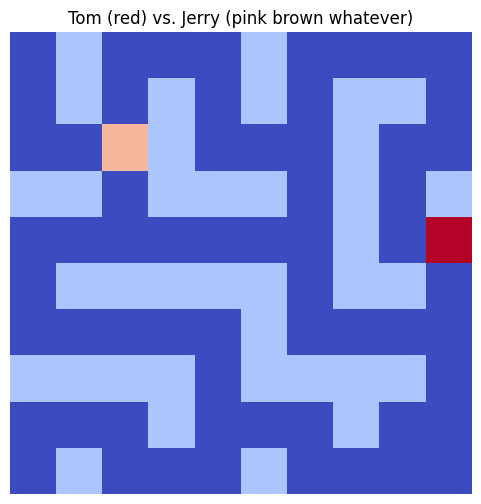

State: [2 2 4 9], Reward: 1


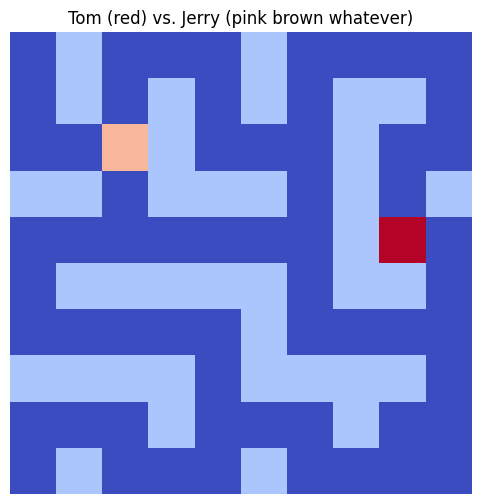

State: [2 2 4 8], Reward: 1


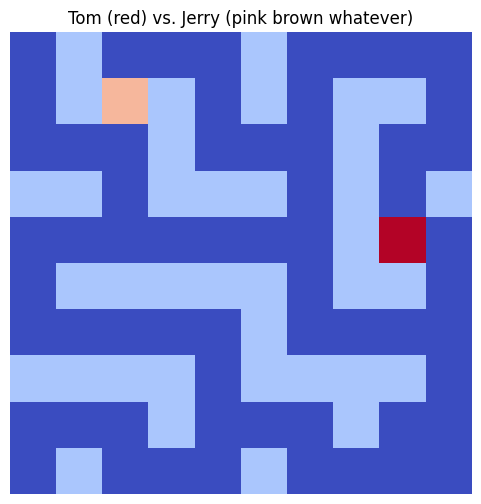

State: [1 2 4 8], Reward: 1


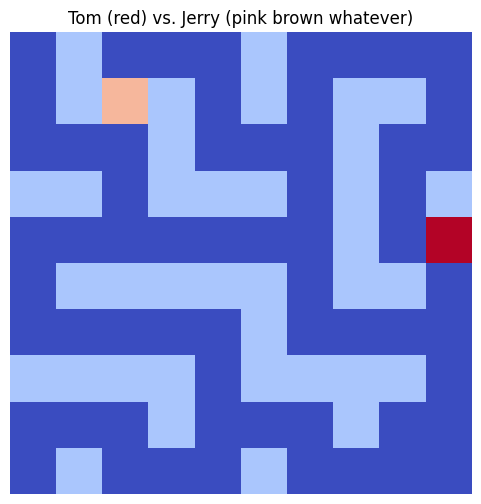

State: [1 2 4 9], Reward: 1


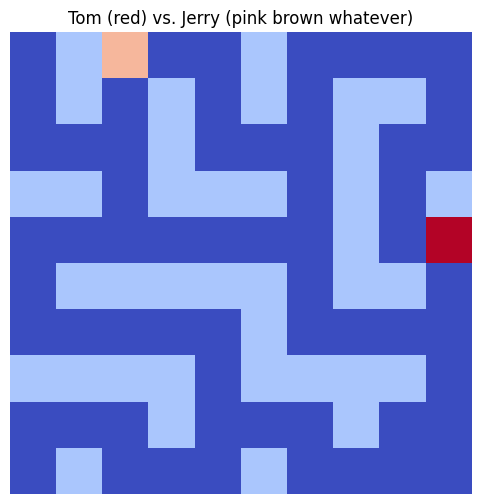

State: [0 2 4 9], Reward: 1


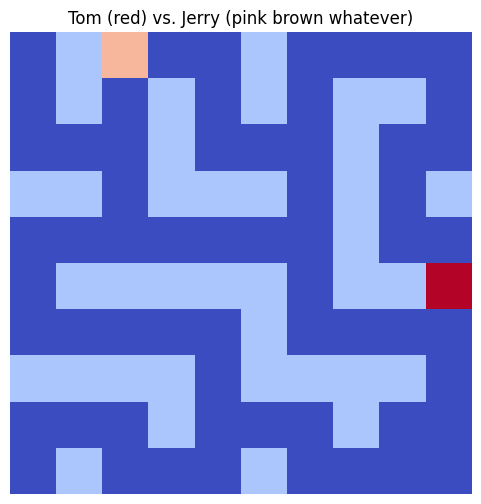

State: [0 2 5 9], Reward: 1


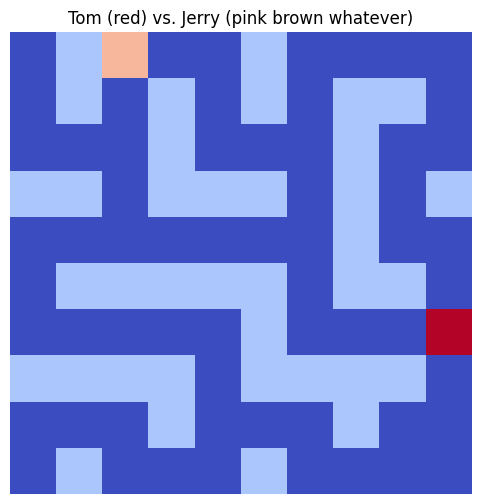

State: [0 2 6 9], Reward: 1


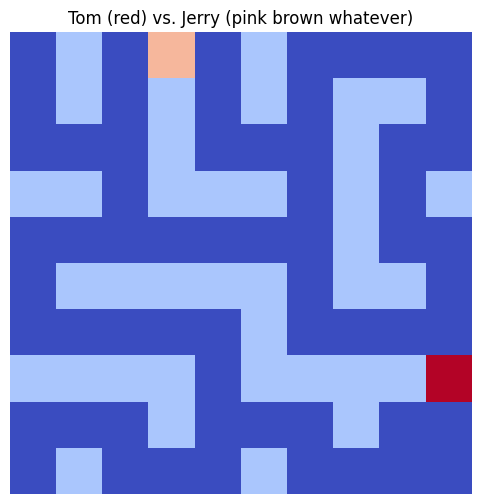

State: [0 3 7 9], Reward: 1


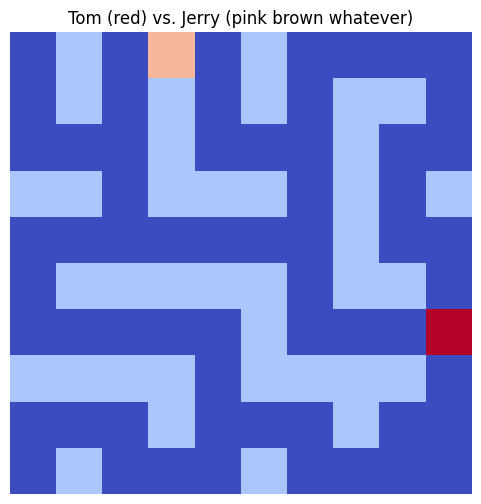

State: [0 3 6 9], Reward: 1


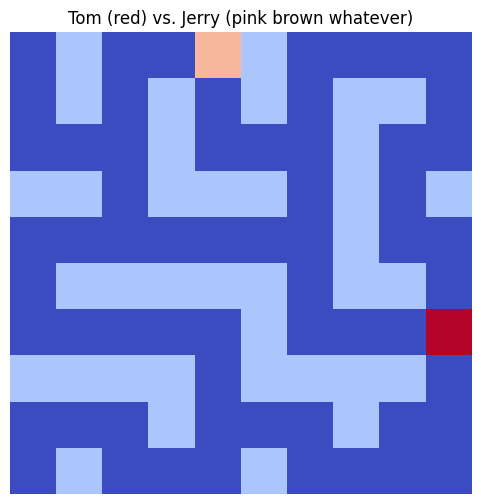

State: [0 4 6 9], Reward: 1


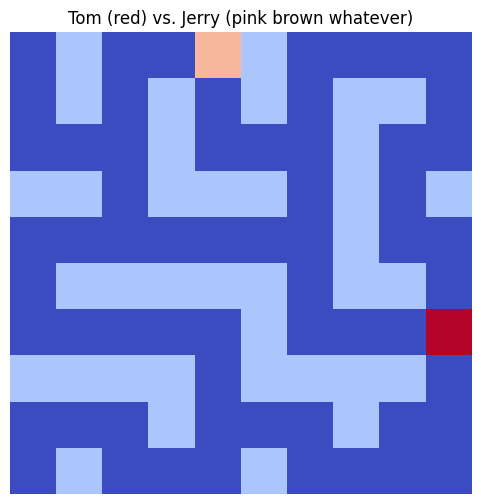

State: [0 4 6 9], Reward: 1


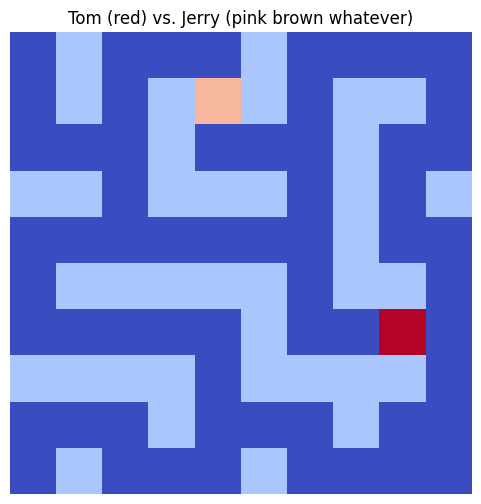

State: [1 4 6 8], Reward: 1


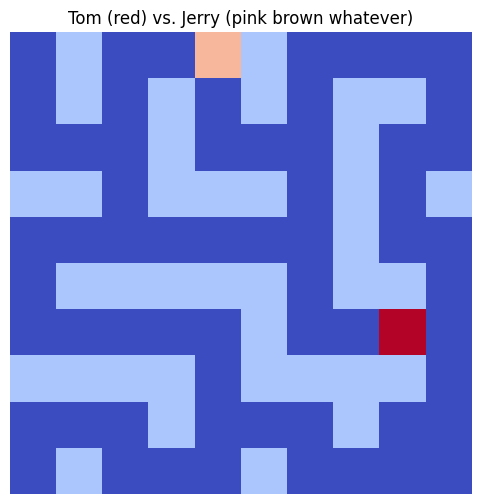

State: [0 4 6 8], Reward: 1


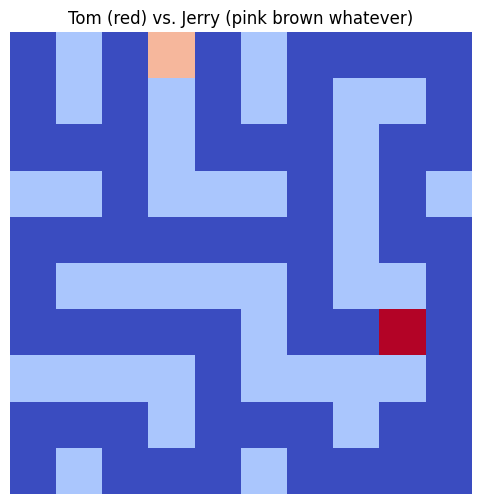

State: [0 3 6 8], Reward: 1


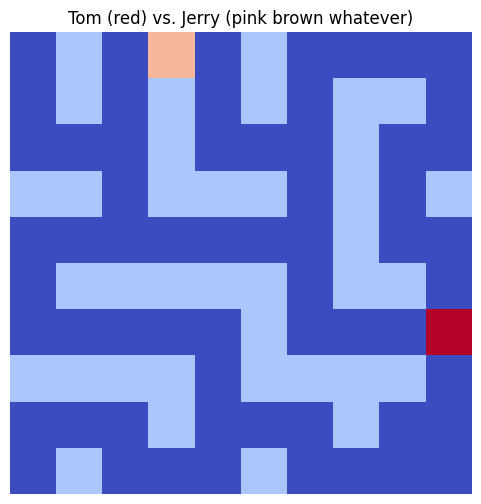

State: [0 3 6 9], Reward: 1


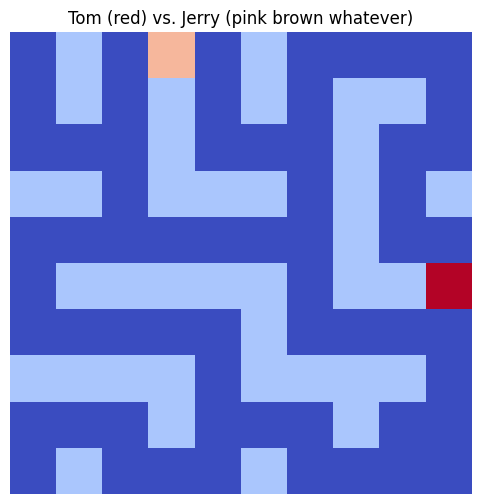

State: [0 3 5 9], Reward: 1


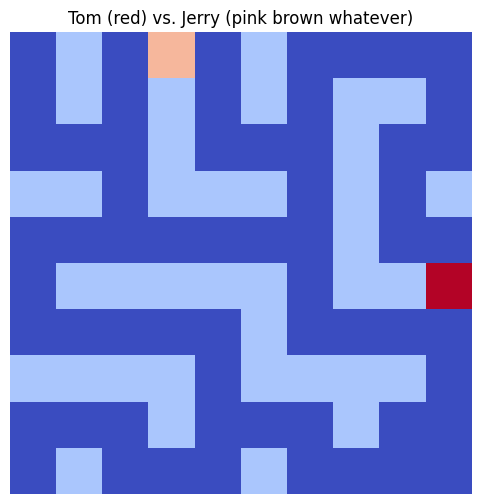

State: [0 3 5 9], Reward: 1


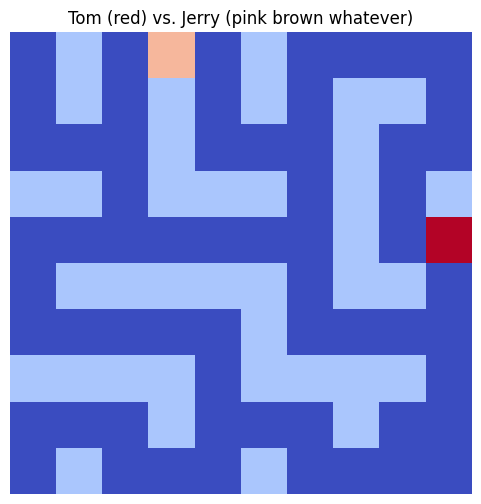

State: [0 3 4 9], Reward: 1


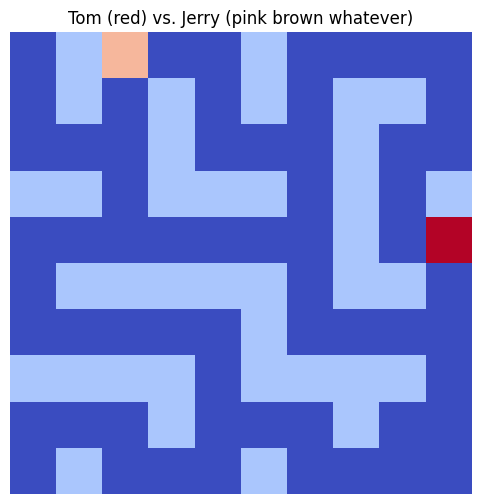

State: [0 2 4 9], Reward: 1


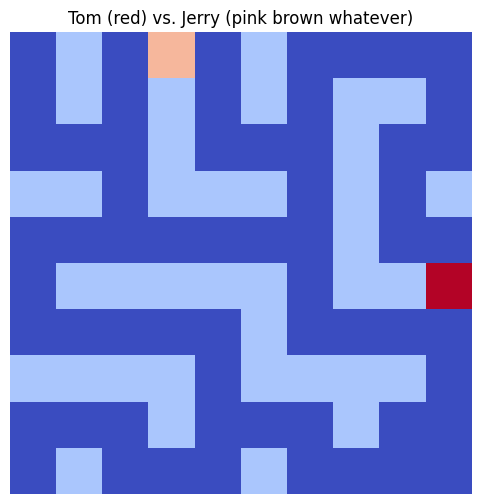

State: [0 3 5 9], Reward: 1


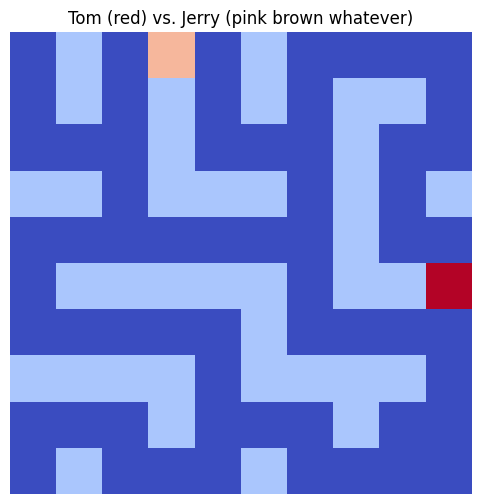

State: [0 3 5 9], Reward: 1


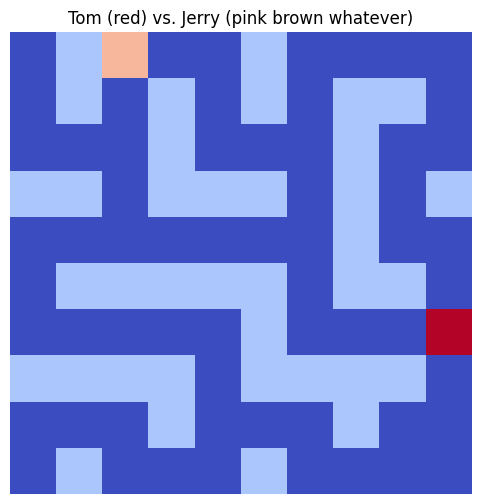

State: [0 2 6 9], Reward: 1


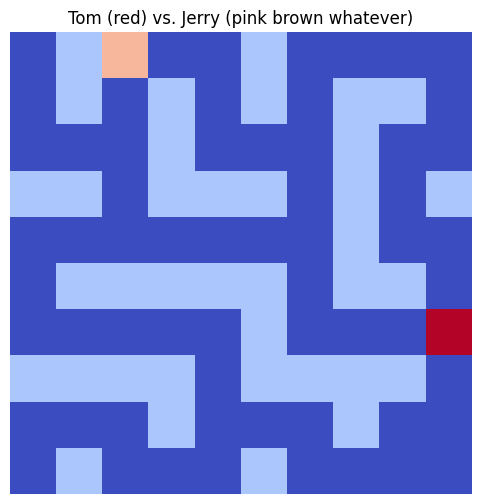

State: [0 2 6 9], Reward: 1


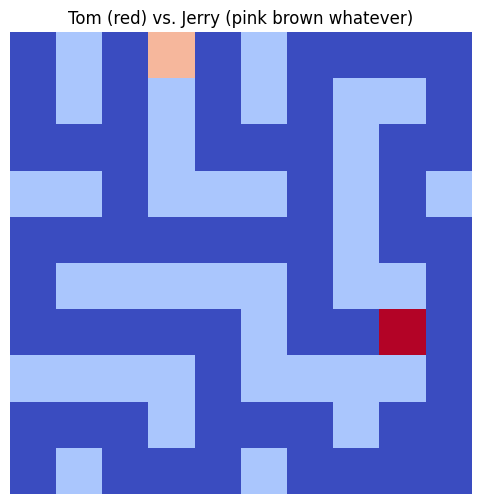

State: [0 3 6 8], Reward: 1


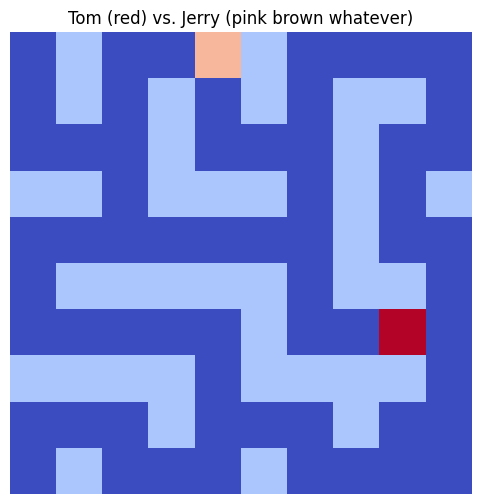

State: [0 4 6 8], Reward: 1


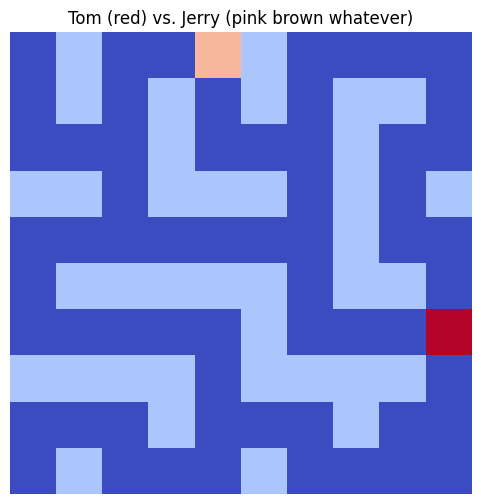

State: [0 4 6 9], Reward: 1


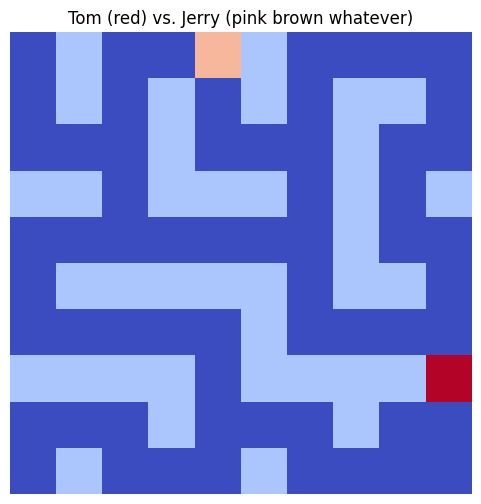

State: [0 4 7 9], Reward: 1


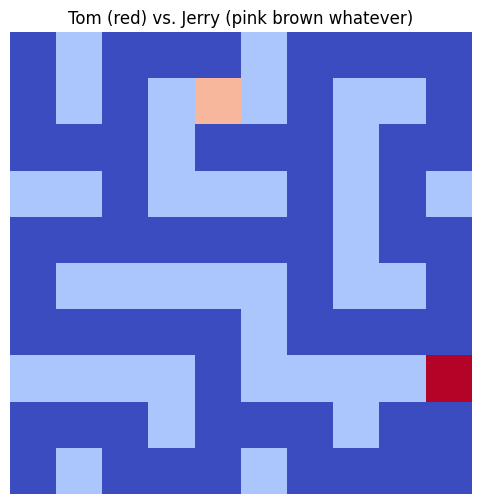

State: [1 4 7 9], Reward: 1


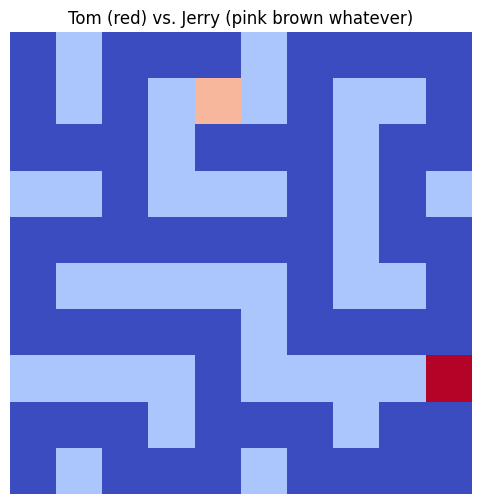

State: [1 4 7 9], Reward: 1


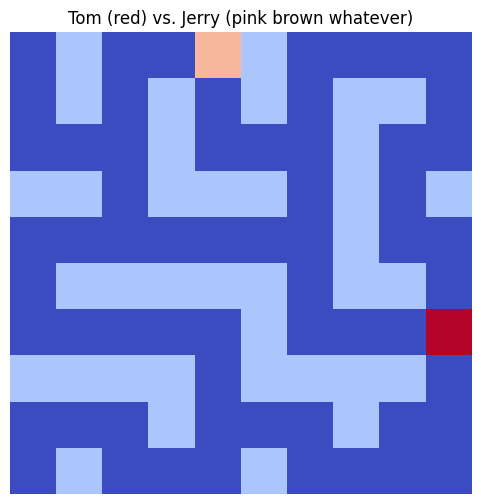

State: [0 4 6 9], Reward: 1


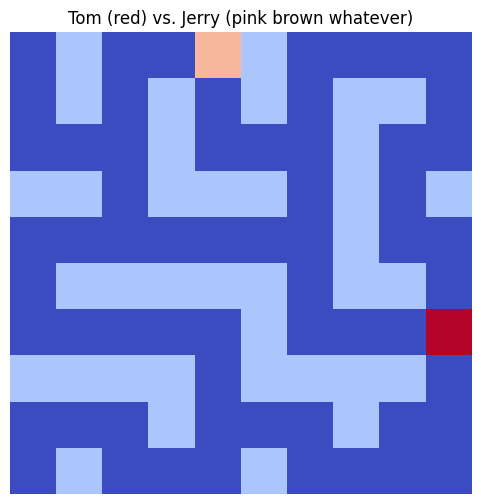

State: [0 4 6 9], Reward: 1


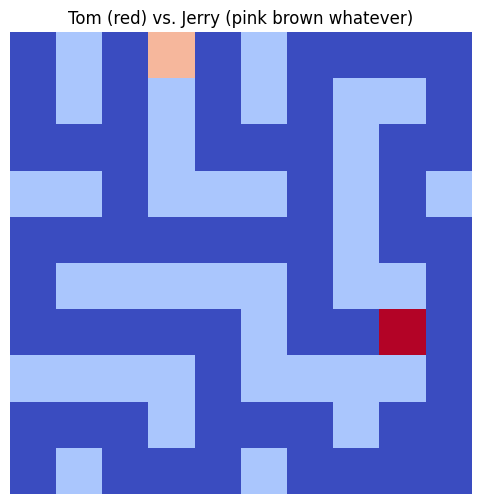

State: [0 3 6 8], Reward: 1


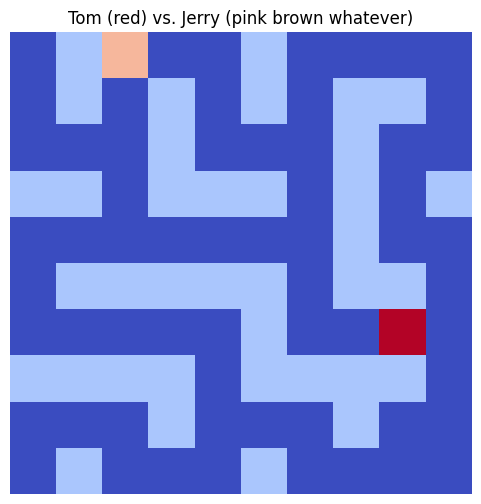

State: [0 2 6 8], Reward: 1


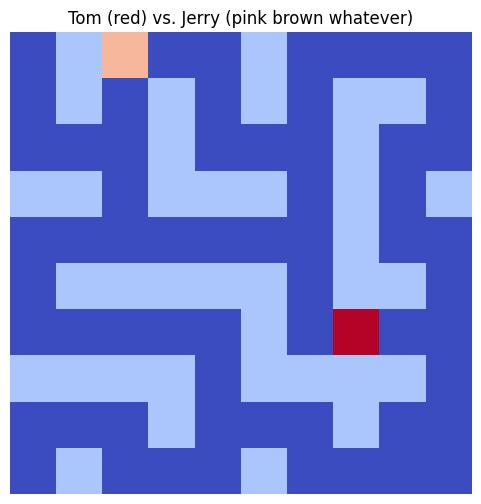

State: [0 2 6 7], Reward: 1


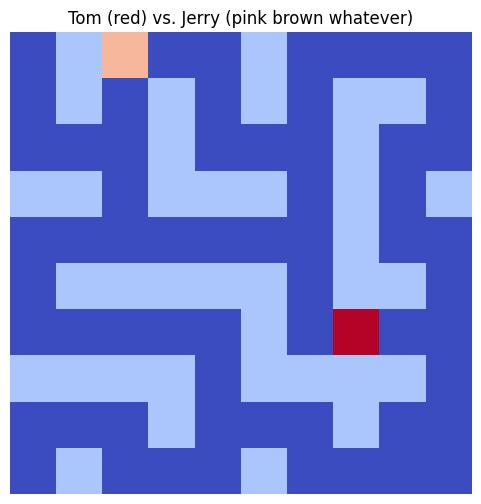

State: [0 2 6 7], Reward: 1


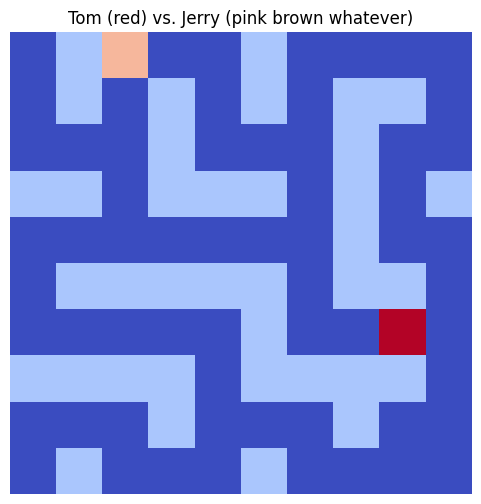

State: [0 2 6 8], Reward: 1


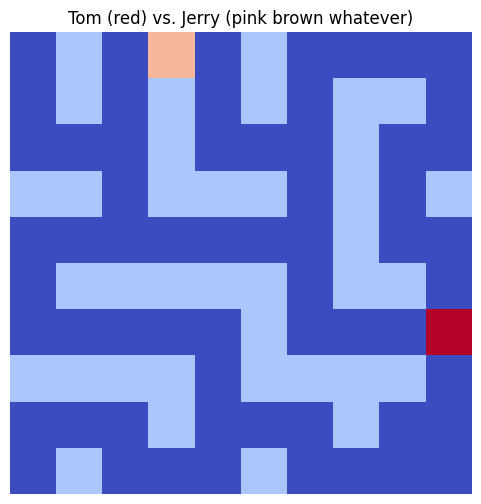

State: [0 3 6 9], Reward: 1


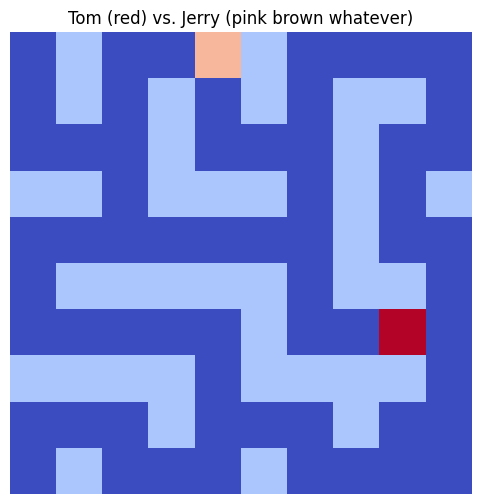

State: [0 4 6 8], Reward: 1


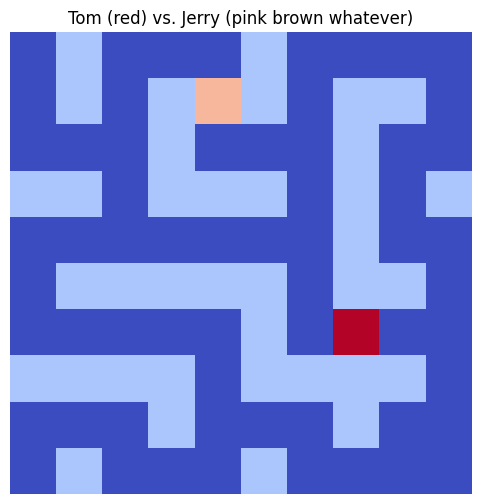

State: [1 4 6 7], Reward: 1


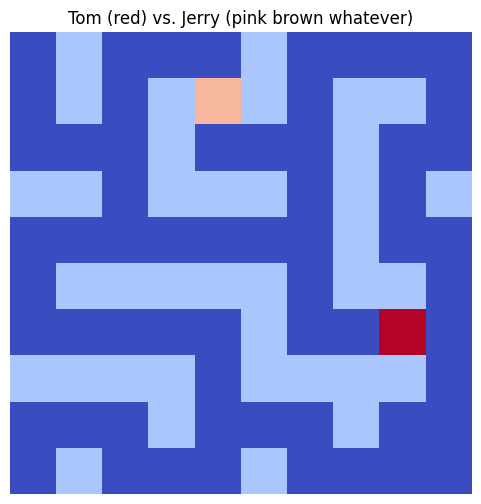

State: [1 4 6 8], Reward: 1


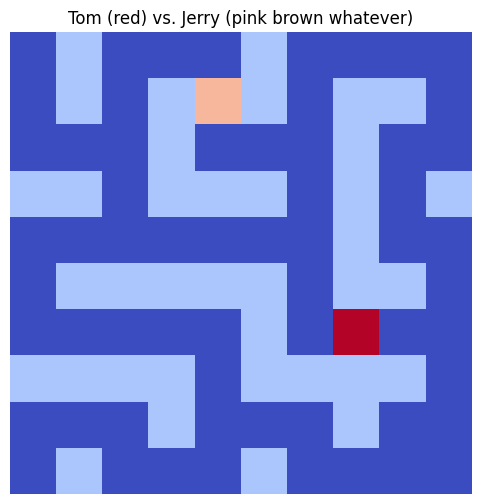

State: [1 4 6 7], Reward: 1


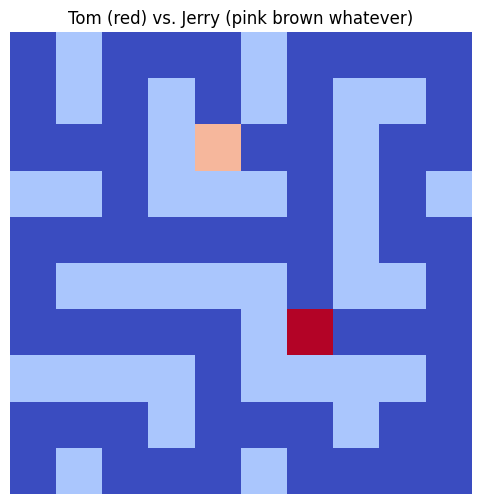

State: [2 4 6 6], Reward: 1


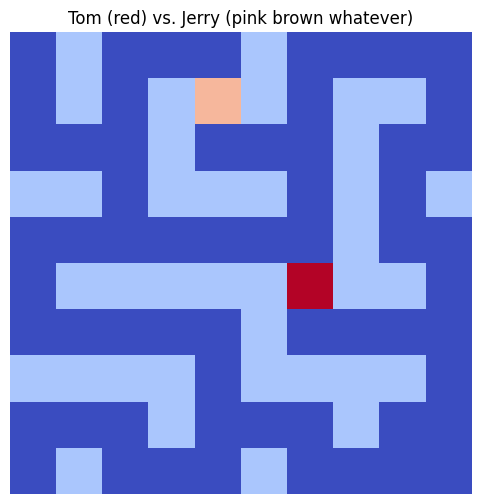

State: [1 4 5 6], Reward: 1


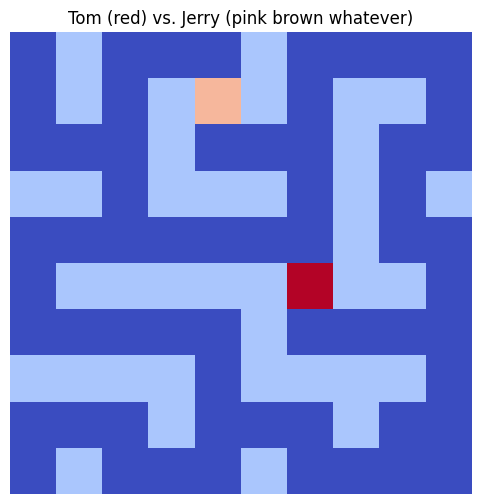

State: [1 4 5 6], Reward: 1


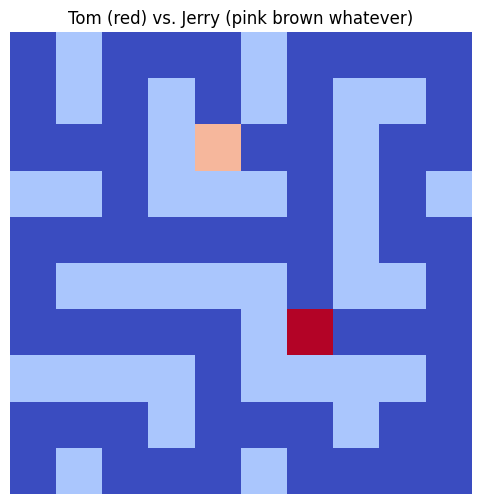

State: [2 4 6 6], Reward: 1


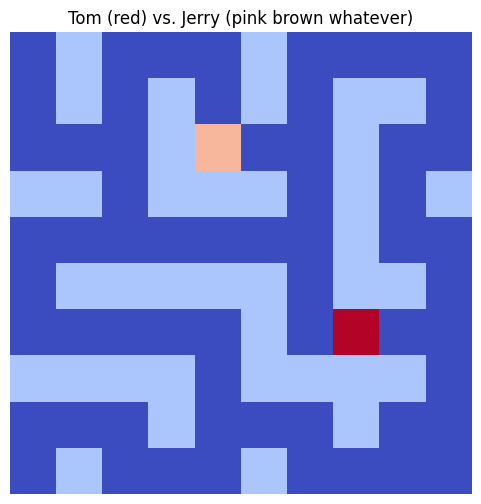

State: [2 4 6 7], Reward: 1


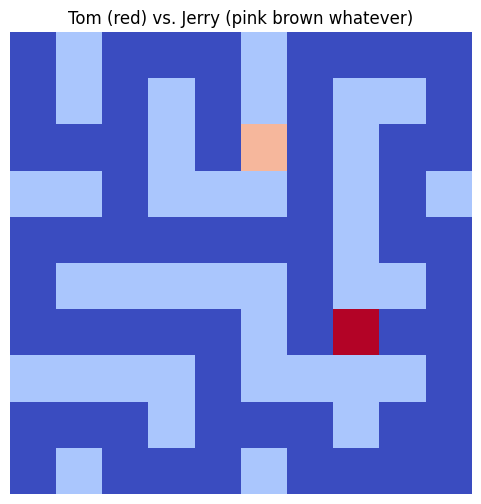

State: [2 5 6 7], Reward: 1


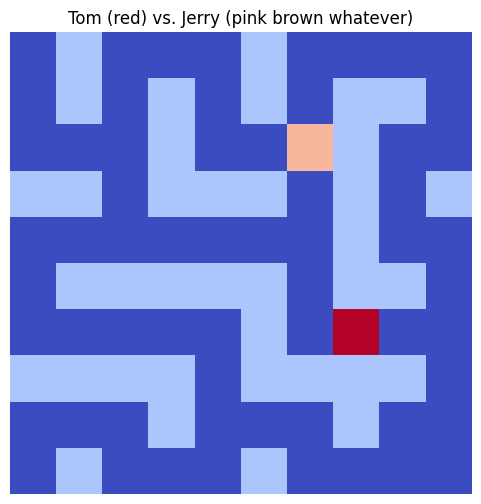

State: [2 6 6 7], Reward: 1


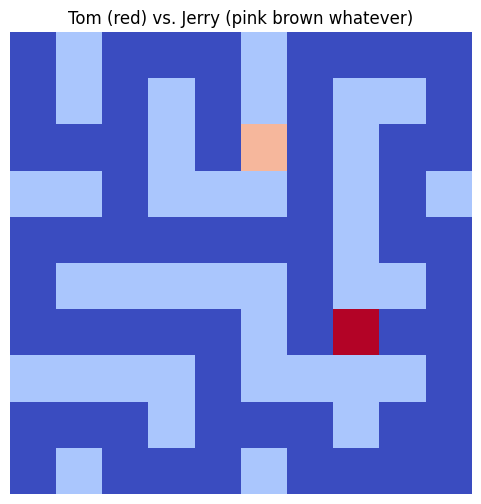

State: [2 5 6 7], Reward: 1


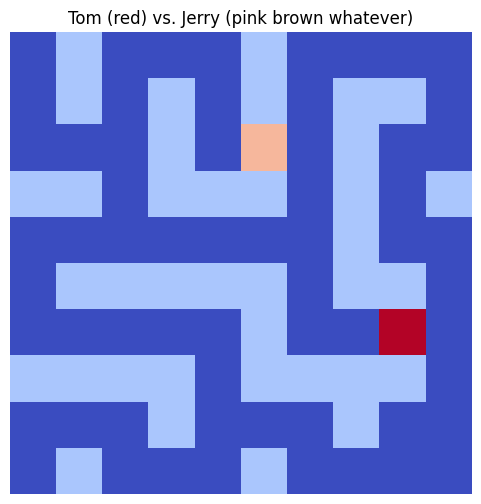

State: [2 5 6 8], Reward: 1


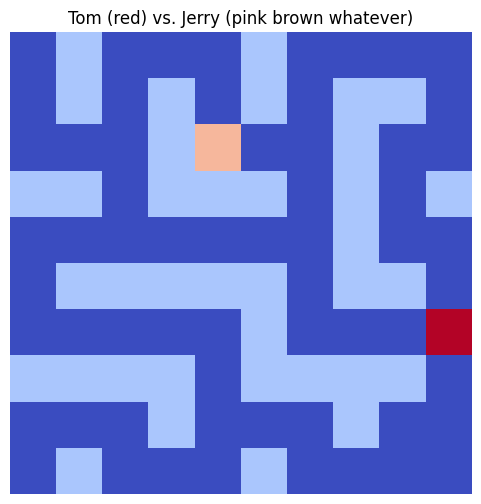

State: [2 4 6 9], Reward: 1


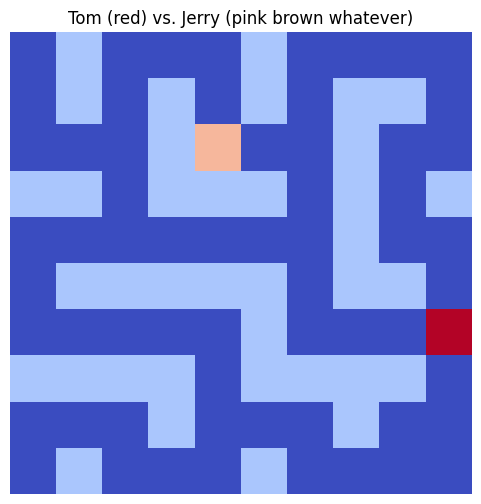

State: [2 4 6 9], Reward: 1


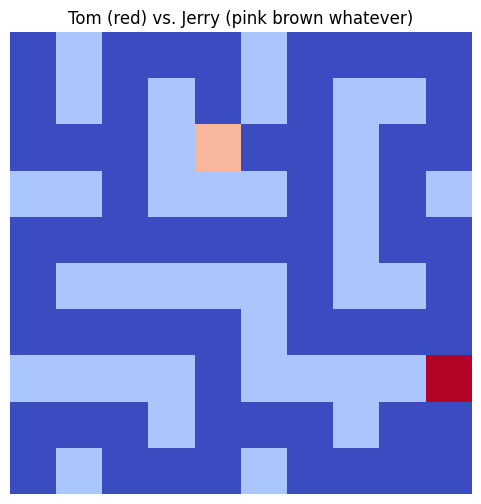

State: [2 4 7 9], Reward: 1


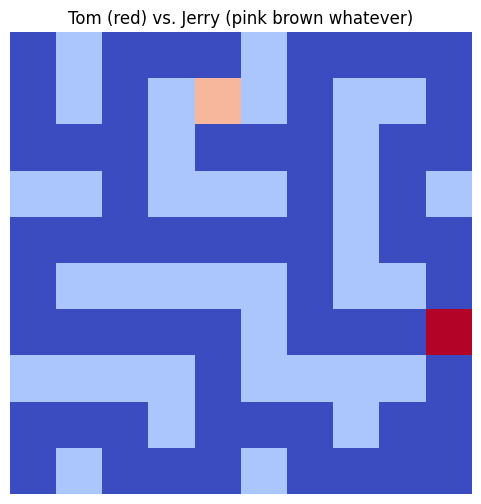

State: [1 4 6 9], Reward: 1


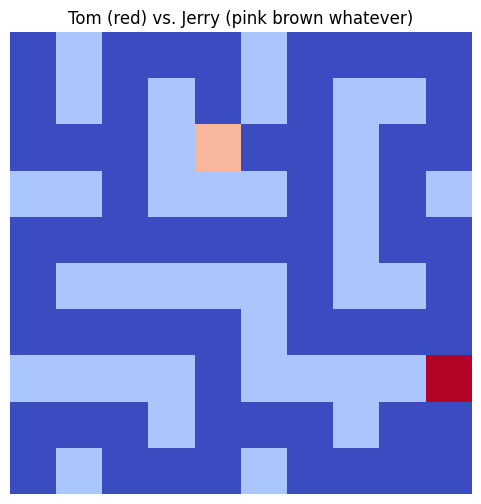

State: [2 4 7 9], Reward: 1


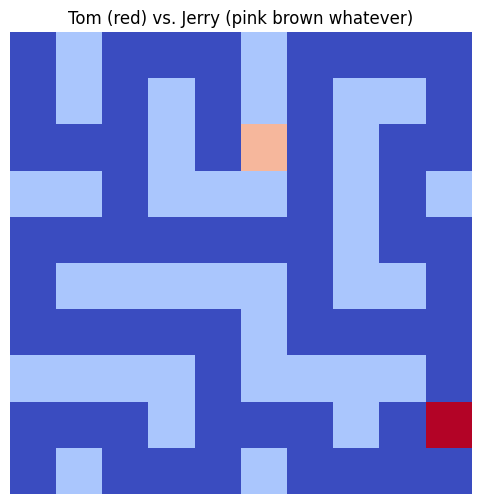

State: [2 5 8 9], Reward: 1


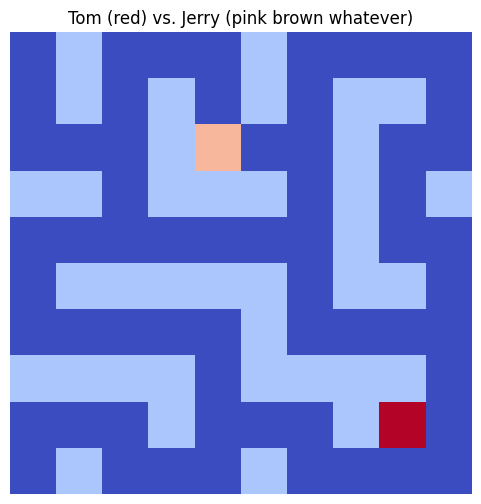

State: [2 4 8 8], Reward: 1


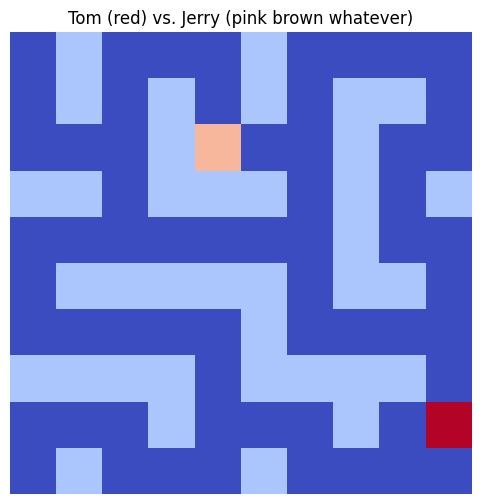

State: [2 4 8 9], Reward: 1


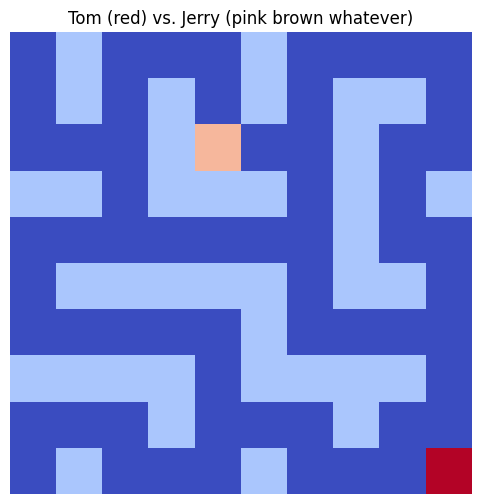

State: [2 4 9 9], Reward: 1


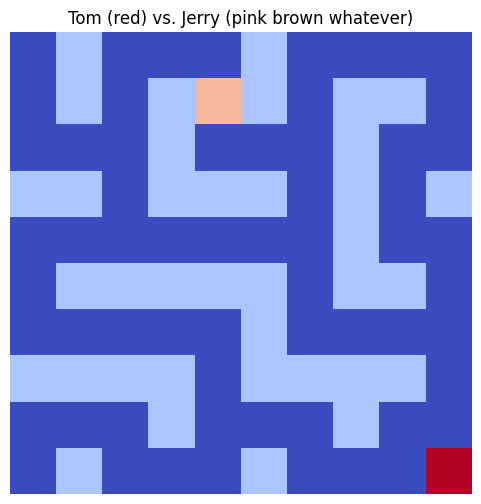

State: [1 4 9 9], Reward: 1


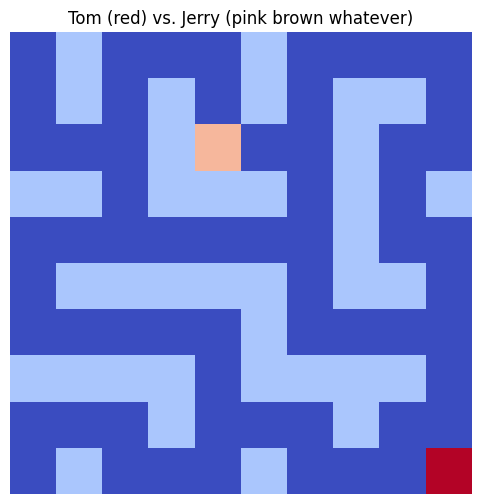

State: [2 4 9 9], Reward: 1


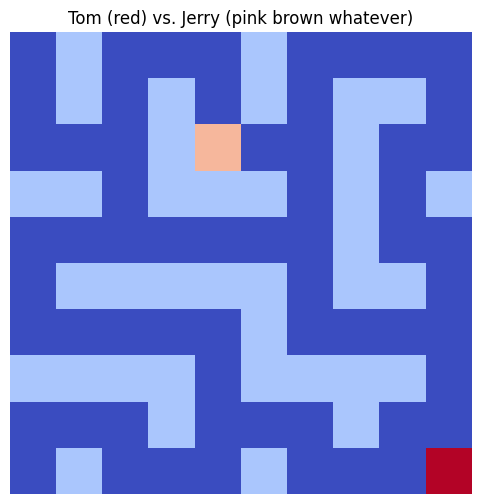

State: [2 4 9 9], Reward: 1


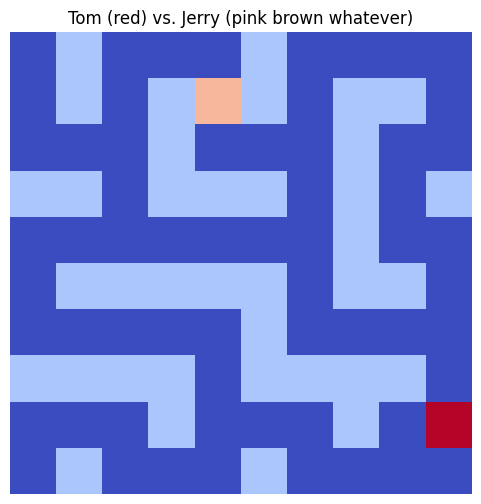

State: [1 4 8 9], Reward: 1


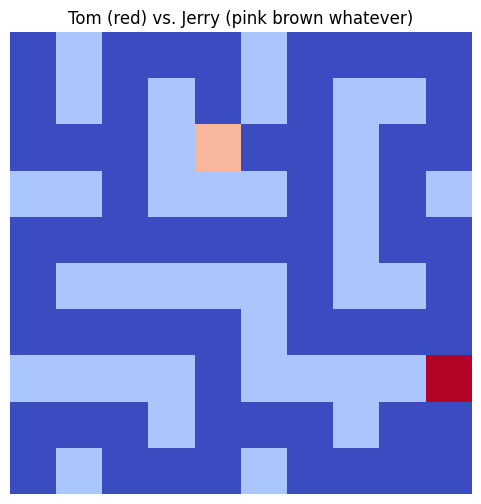

State: [2 4 7 9], Reward: 1


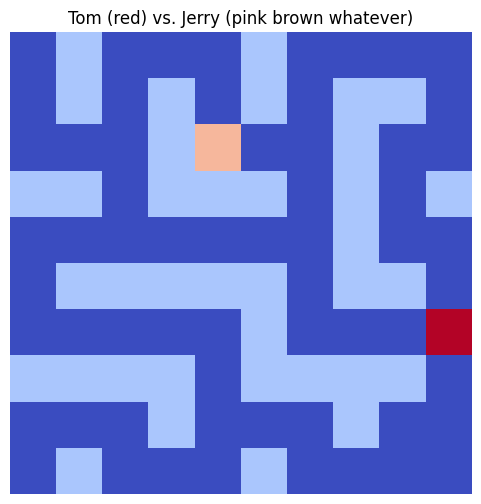

State: [2 4 6 9], Reward: 1


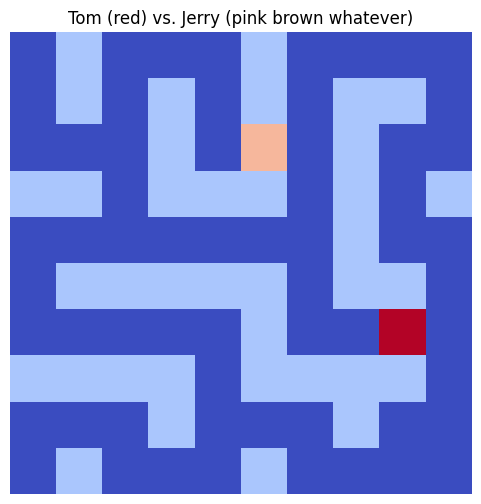

State: [2 5 6 8], Reward: 1


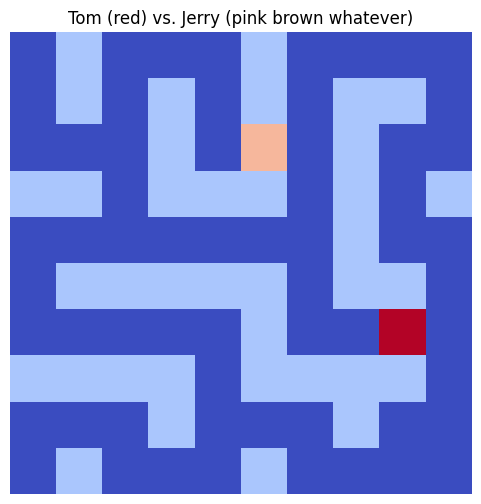

State: [2 5 6 8], Reward: 1


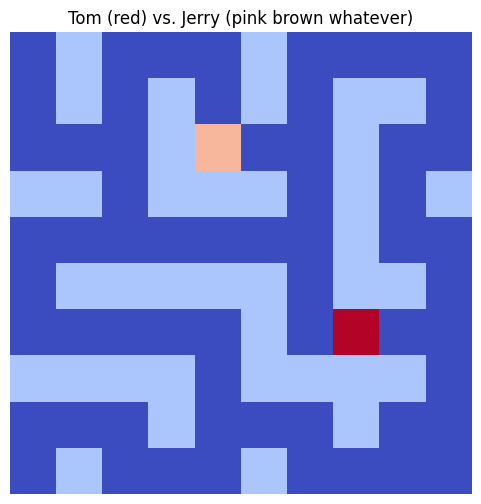

State: [2 4 6 7], Reward: 1


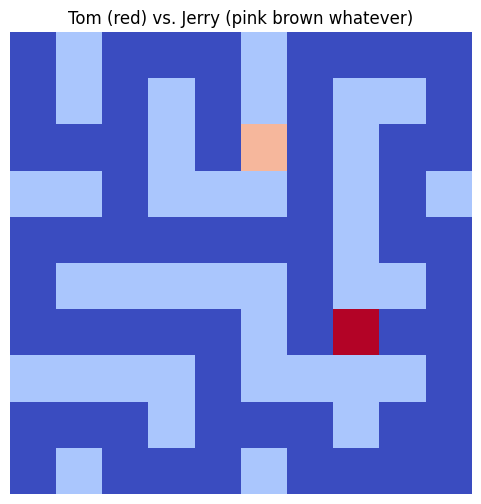

State: [2 5 6 7], Reward: 1


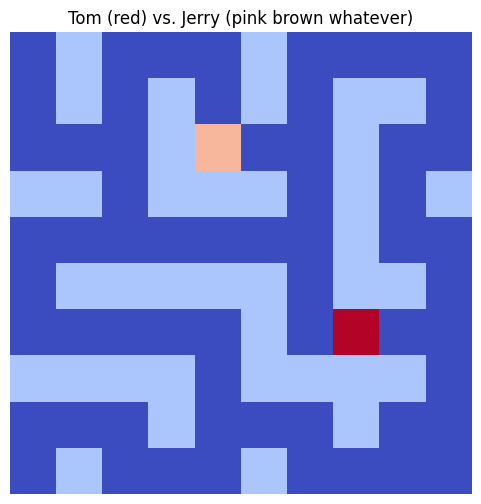

State: [2 4 6 7], Reward: 1


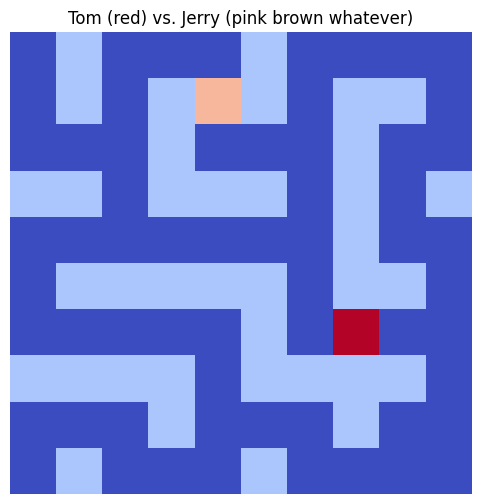

State: [1 4 6 7], Reward: 1


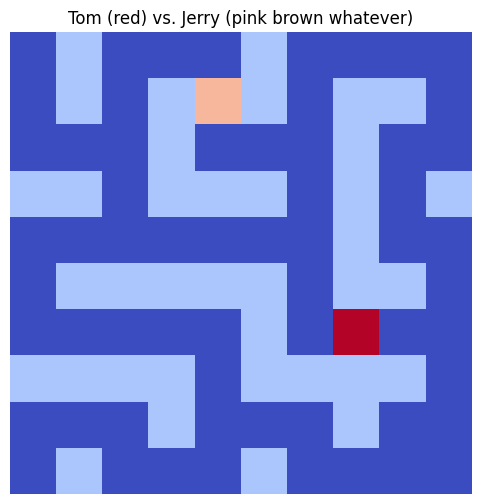

State: [1 4 6 7], Reward: 1


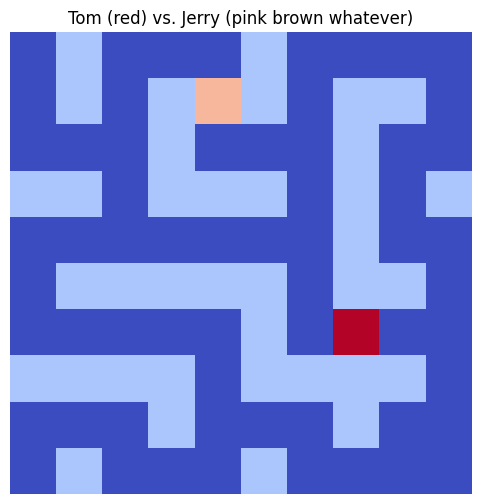

State: [1 4 6 7], Reward: 1


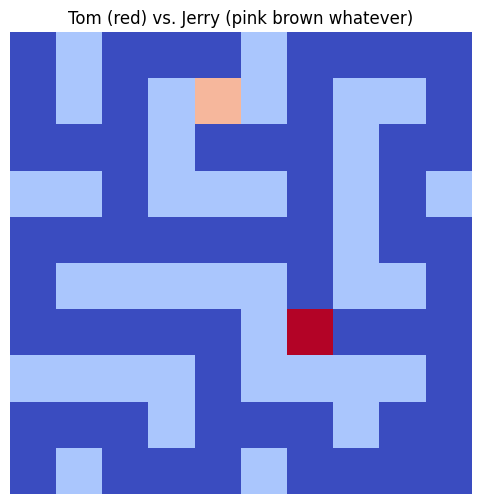

State: [1 4 6 6], Reward: 1


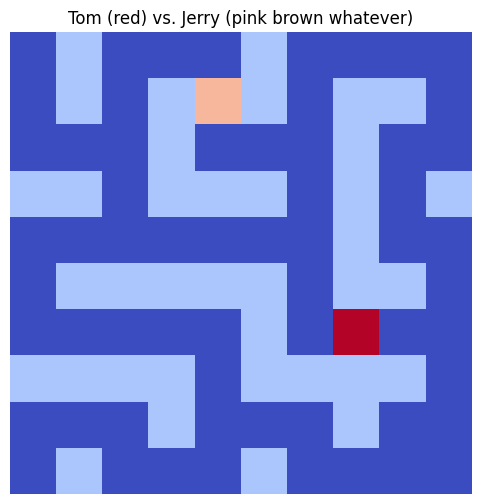

State: [1 4 6 7], Reward: 1


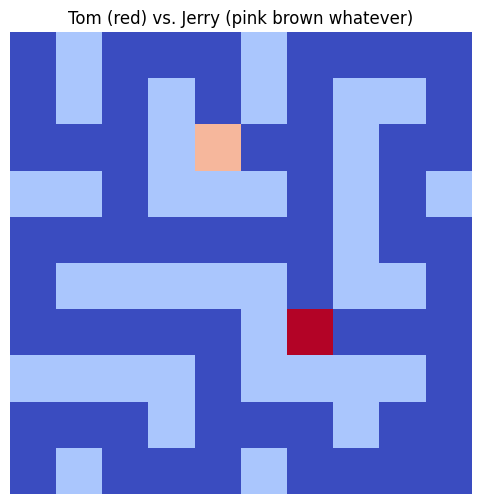

State: [2 4 6 6], Reward: 1


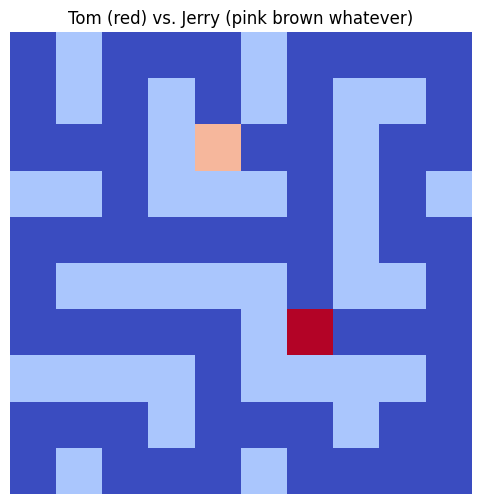

State: [2 4 6 6], Reward: 1


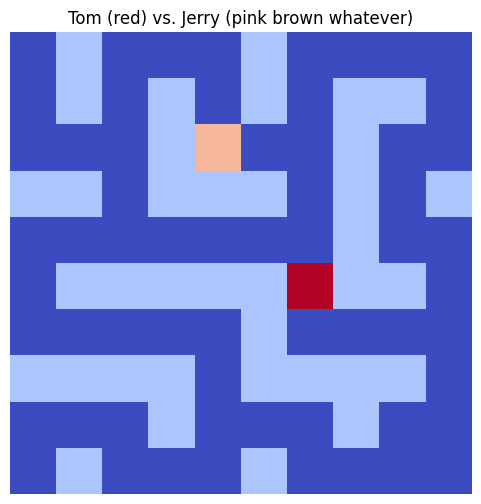

State: [2 4 5 6], Reward: 1


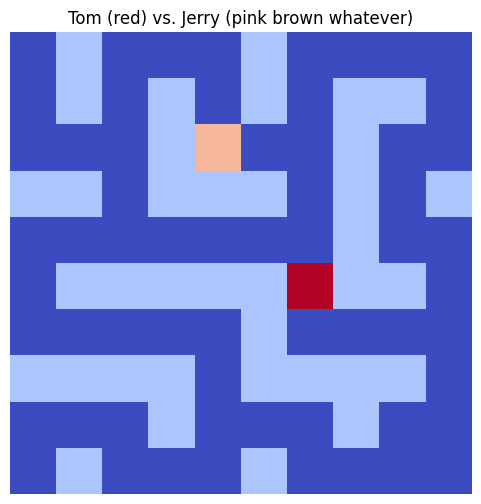

State: [2 4 5 6], Reward: 1


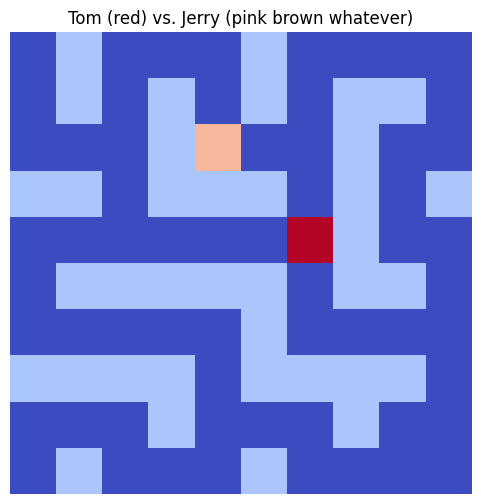

State: [2 4 4 6], Reward: 1


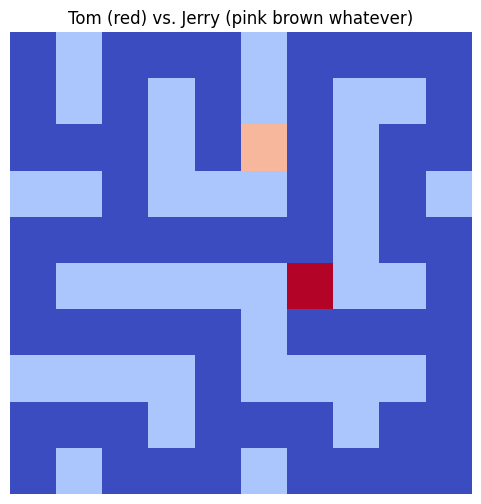

State: [2 5 5 6], Reward: 1


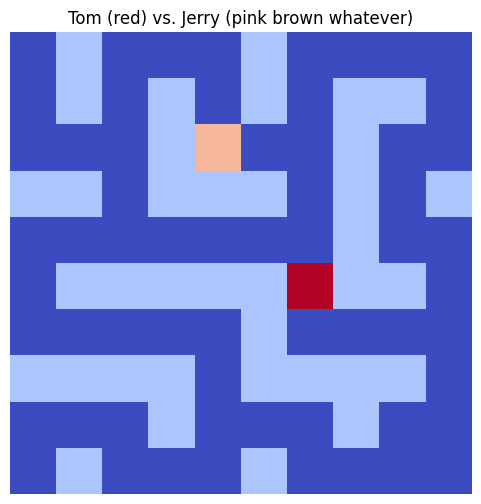

State: [2 4 5 6], Reward: 1


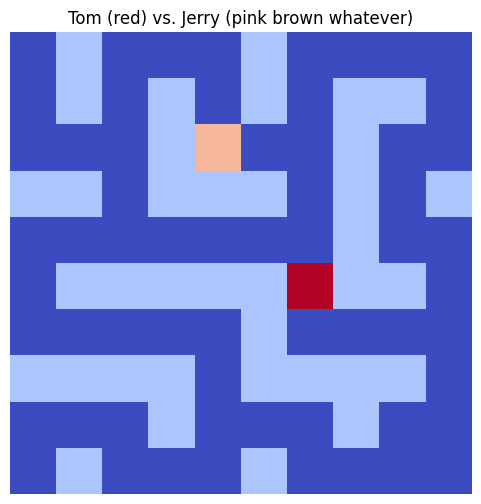

State: [2 4 5 6], Reward: 1


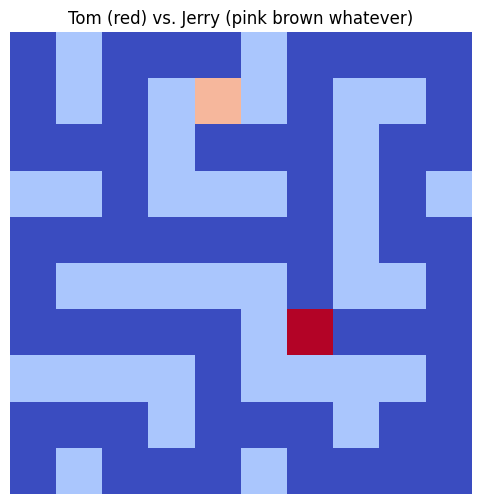

State: [1 4 6 6], Reward: 1


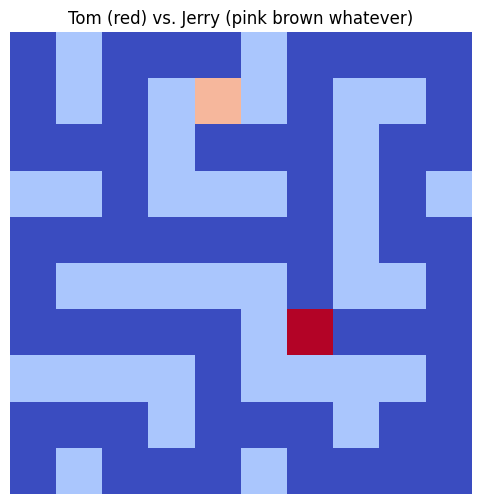

State: [1 4 6 6], Reward: 1


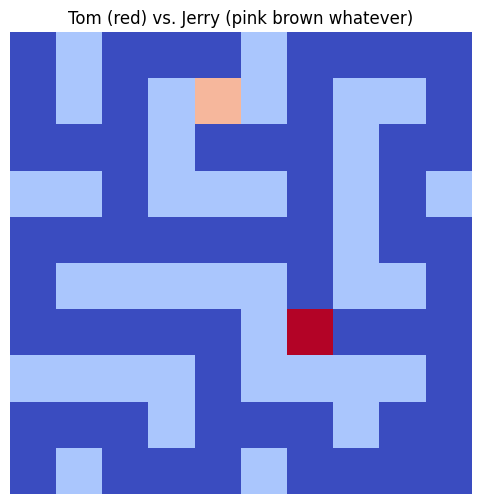

State: [1 4 6 6], Reward: 1


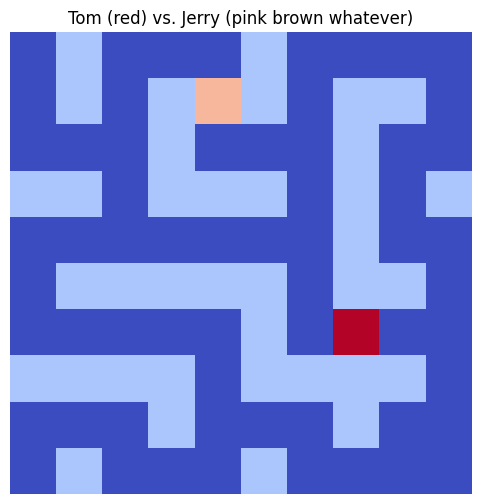

State: [1 4 6 7], Reward: 1


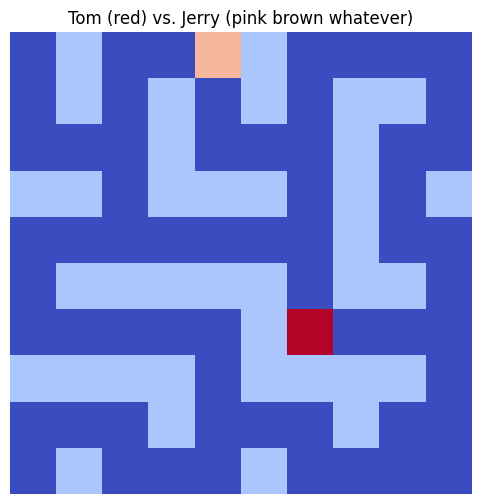

State: [0 4 6 6], Reward: 1


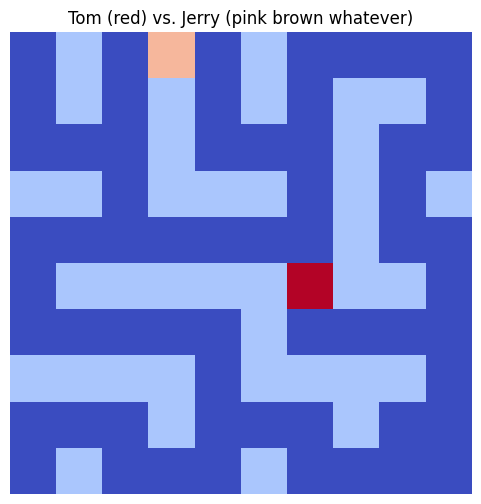

State: [0 3 5 6], Reward: 1


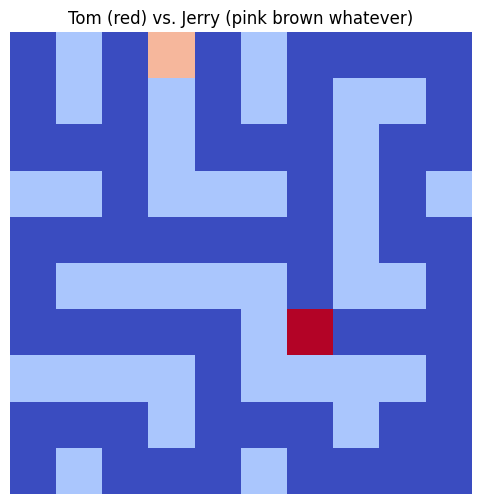

State: [0 3 6 6], Reward: 1


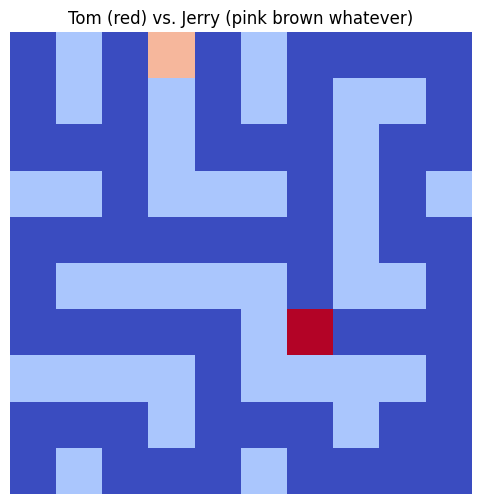

State: [0 3 6 6], Reward: 1


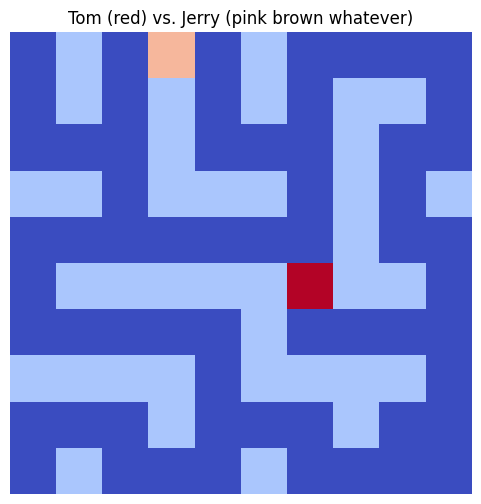

State: [0 3 5 6], Reward: 1


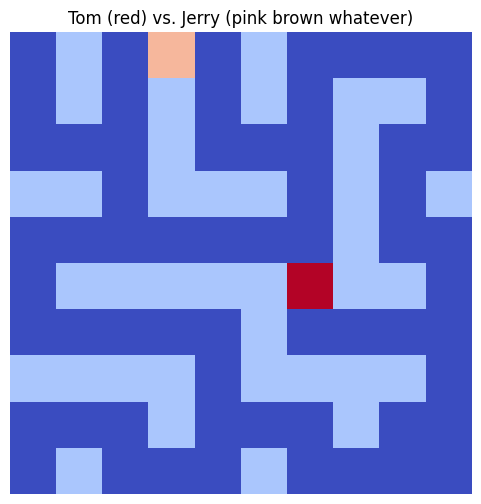

State: [0 3 5 6], Reward: 1


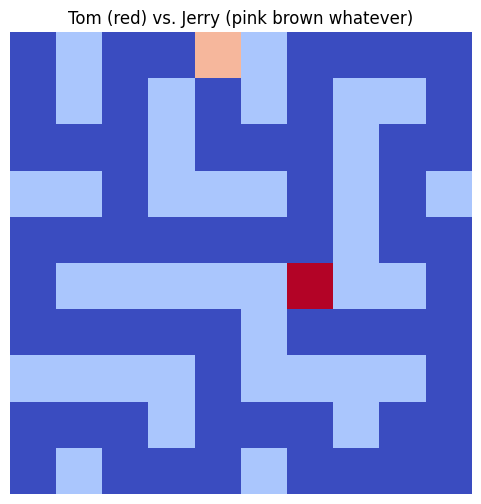

State: [0 4 5 6], Reward: 1


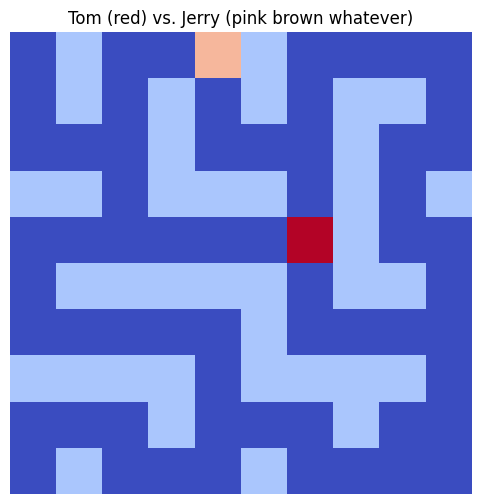

State: [0 4 4 6], Reward: 1


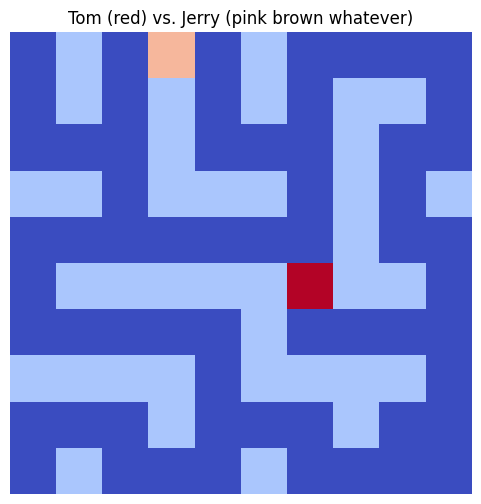

State: [0 3 5 6], Reward: 1


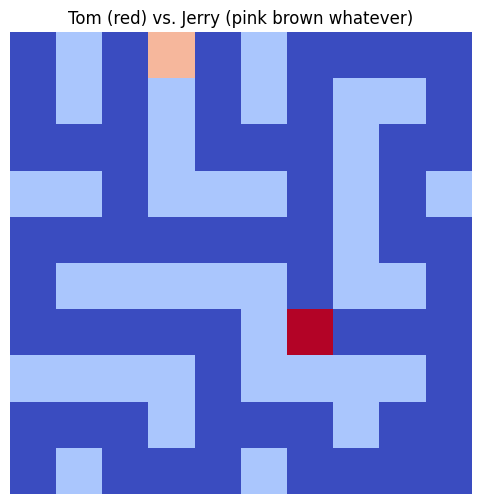

State: [0 3 6 6], Reward: 1


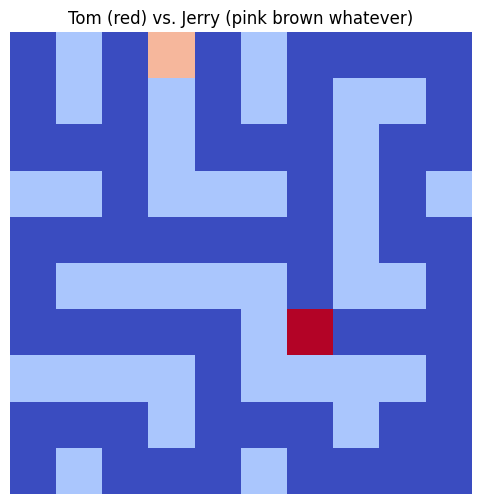

State: [0 3 6 6], Reward: 1


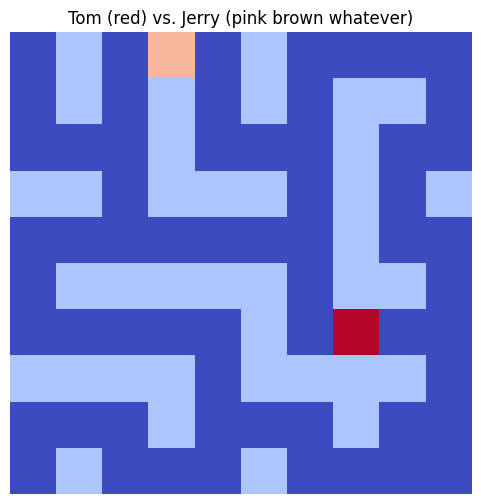

State: [0 3 6 7], Reward: 1


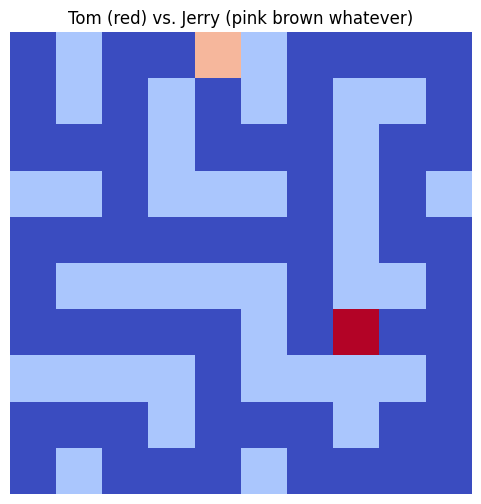

State: [0 4 6 7], Reward: 1


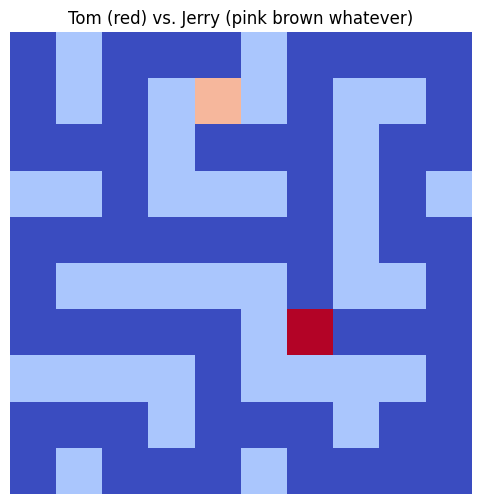

State: [1 4 6 6], Reward: 1


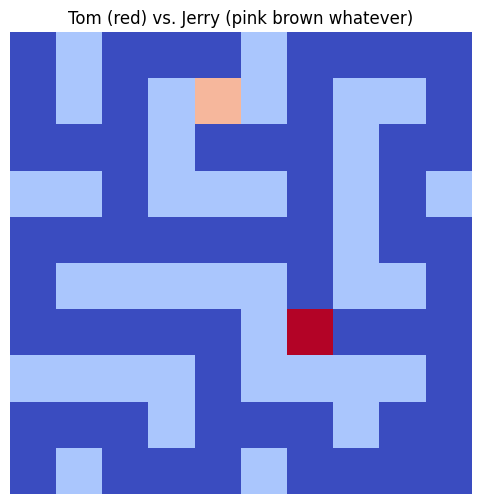

State: [1 4 6 6], Reward: 1


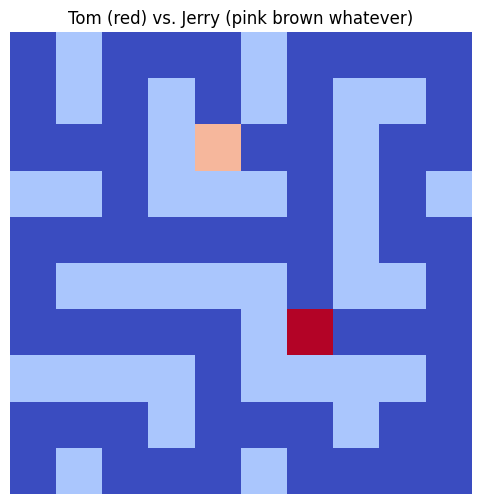

State: [2 4 6 6], Reward: 1


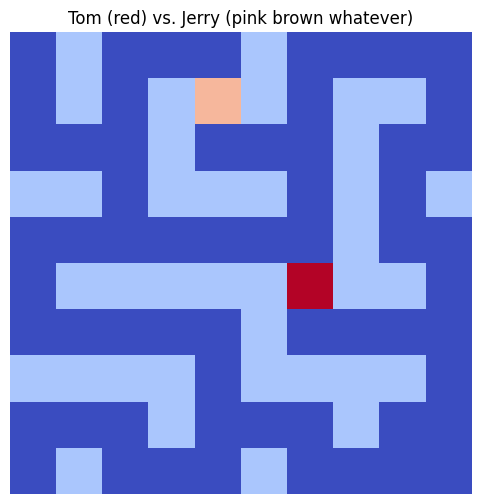

State: [1 4 5 6], Reward: 1


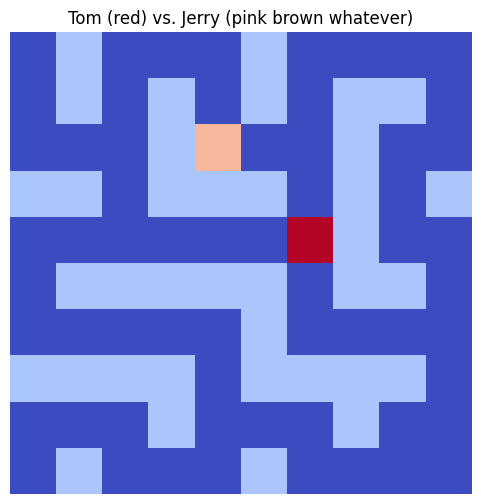

State: [2 4 4 6], Reward: 1


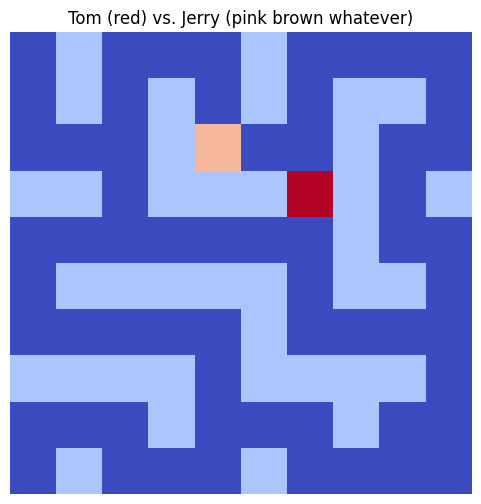

State: [2 4 3 6], Reward: 1


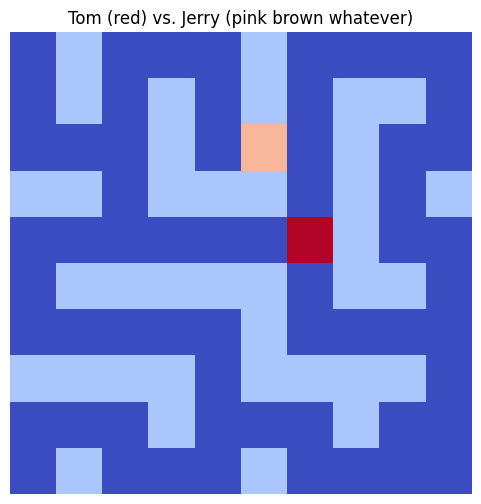

State: [2 5 4 6], Reward: 1


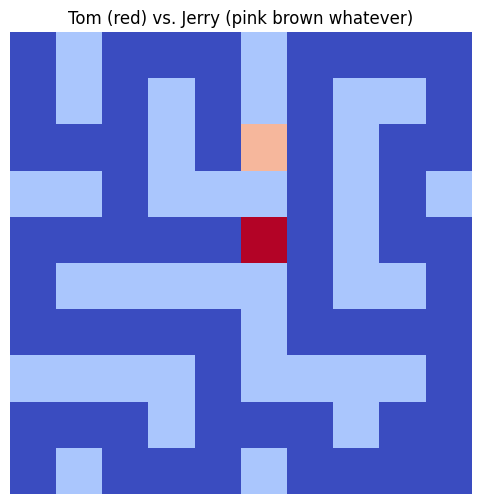

State: [2 5 4 5], Reward: 1


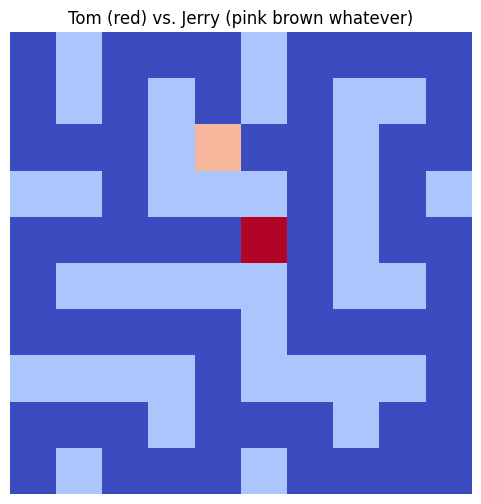

State: [2 4 4 5], Reward: 1


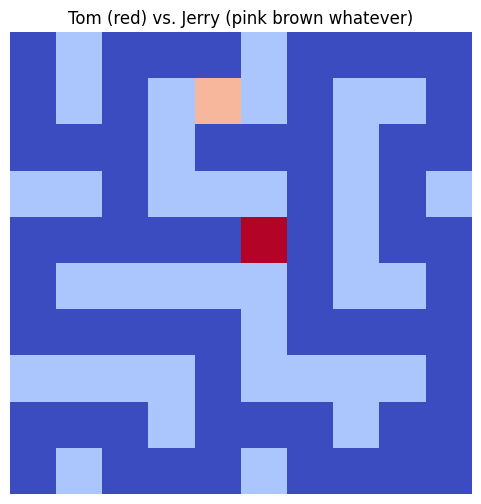

State: [1 4 4 5], Reward: 1


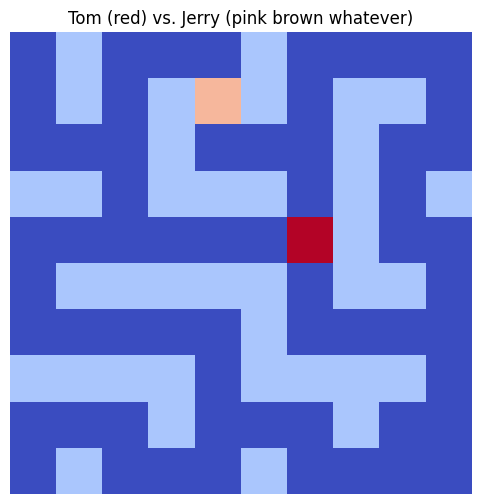

State: [1 4 4 6], Reward: 1


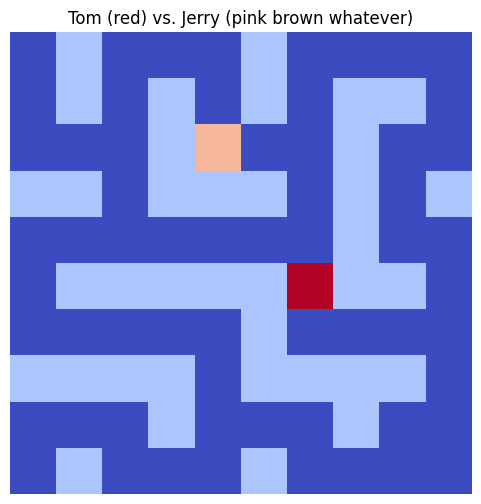

State: [2 4 5 6], Reward: 1


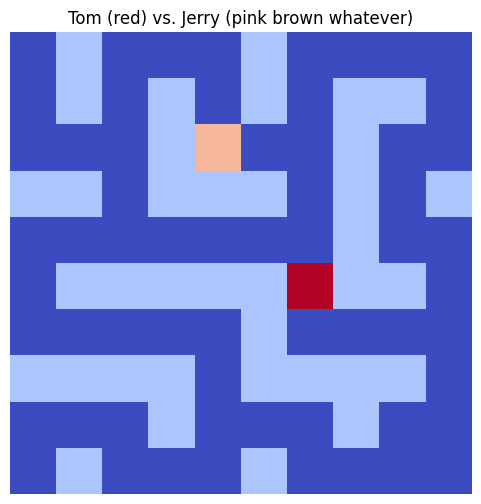

State: [2 4 5 6], Reward: 1


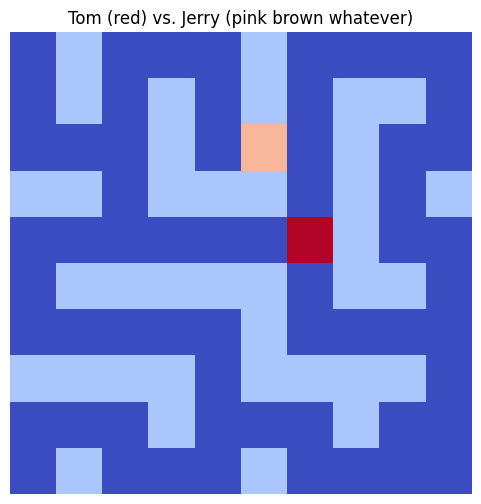

State: [2 5 4 6], Reward: 1


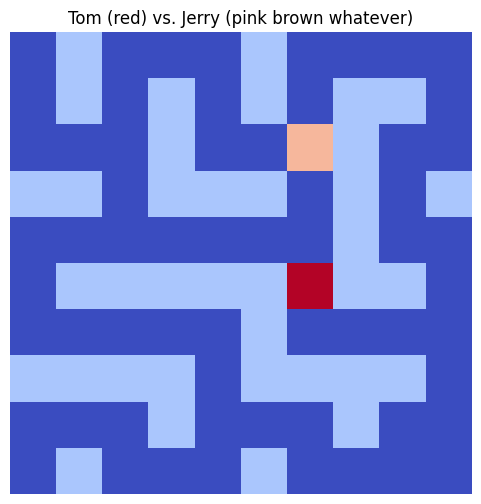

State: [2 6 5 6], Reward: 1


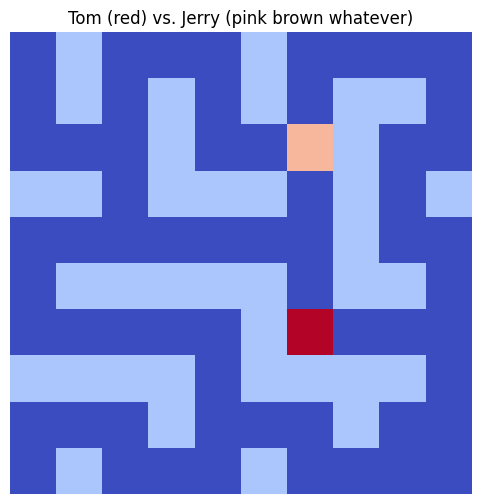

State: [2 6 6 6], Reward: 1


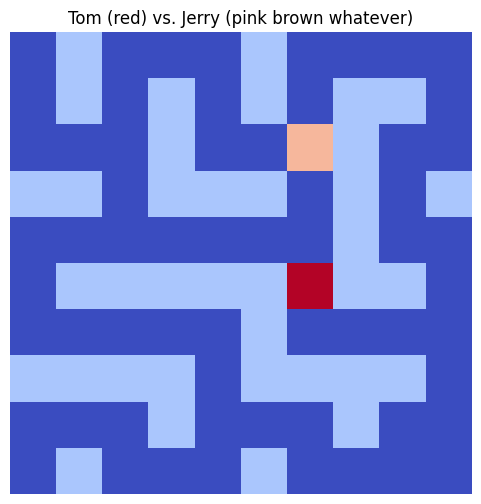

State: [2 6 5 6], Reward: 1


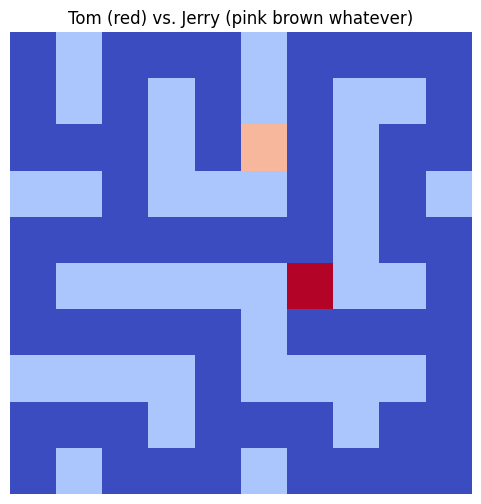

State: [2 5 5 6], Reward: 1


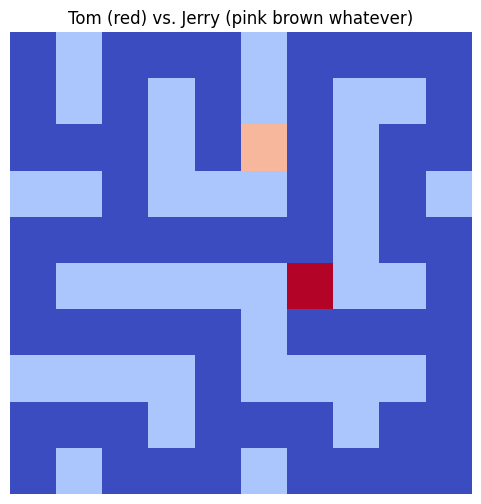

State: [2 5 5 6], Reward: 1


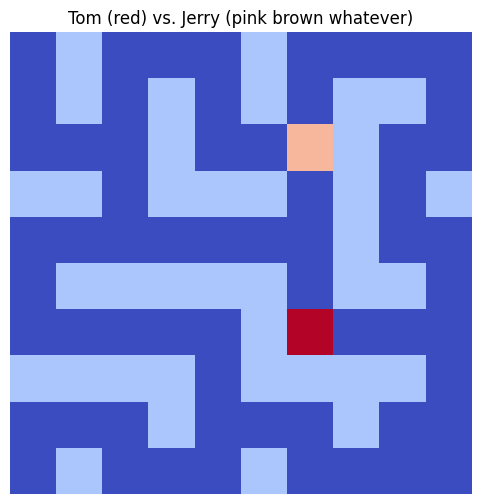

State: [2 6 6 6], Reward: 1


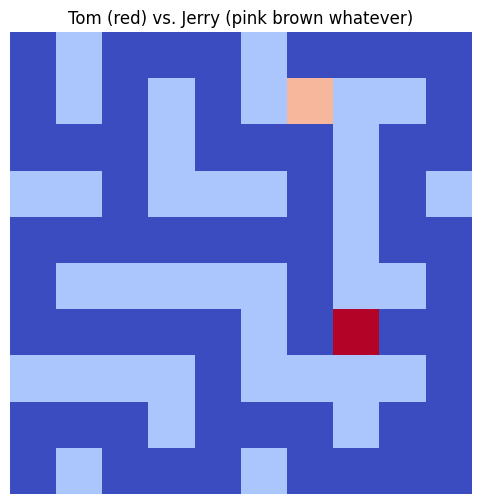

State: [1 6 6 7], Reward: 1


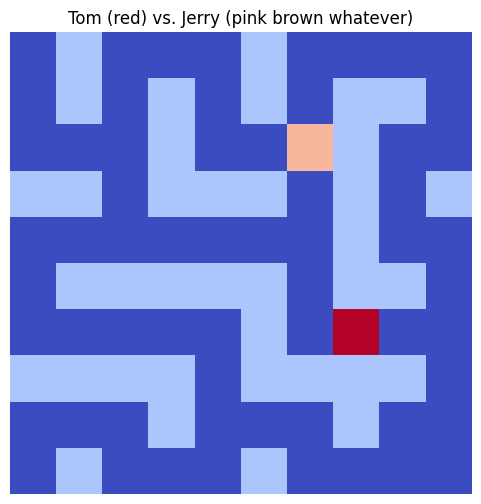

State: [2 6 6 7], Reward: 1


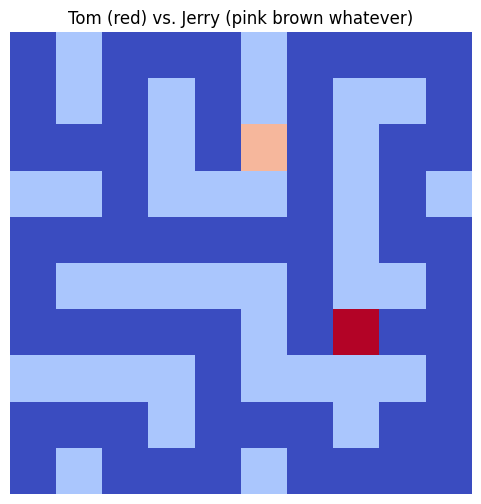

State: [2 5 6 7], Reward: 1


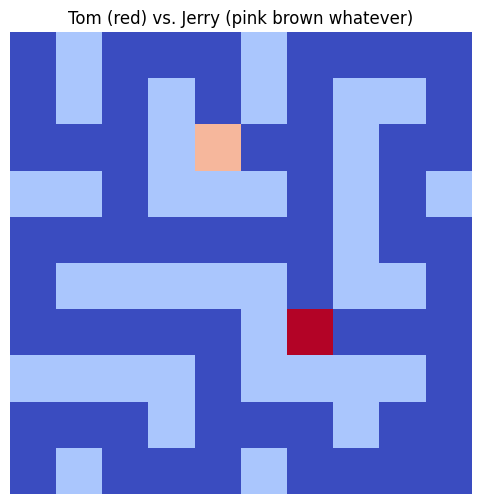

State: [2 4 6 6], Reward: 1


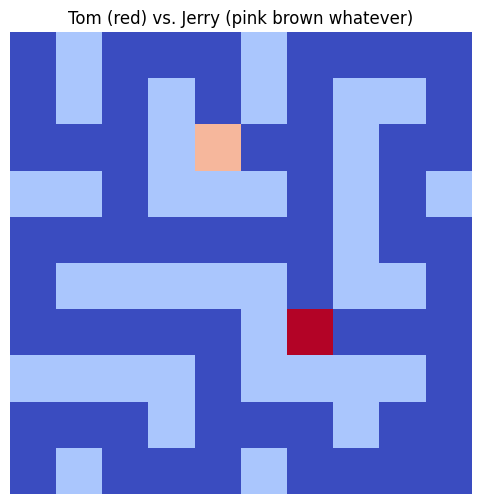

State: [2 4 6 6], Reward: 1


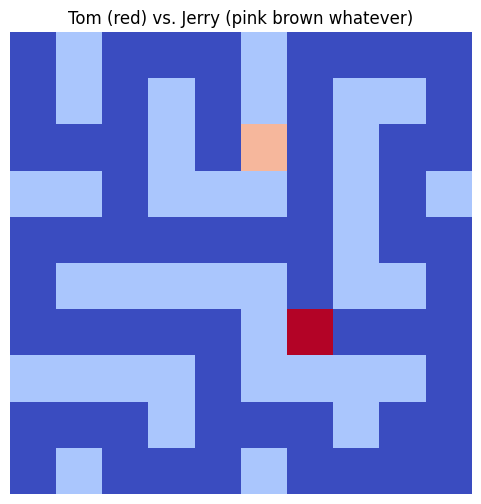

State: [2 5 6 6], Reward: 1


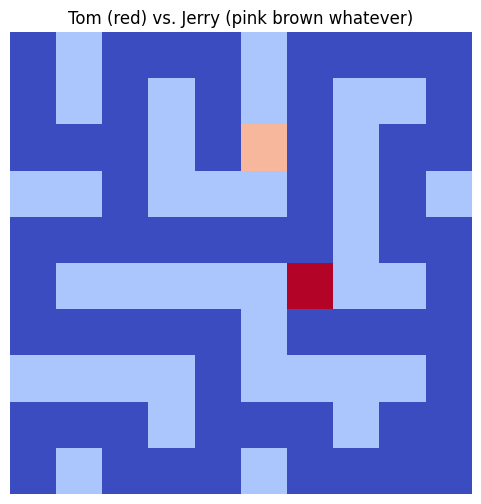

State: [2 5 5 6], Reward: 1


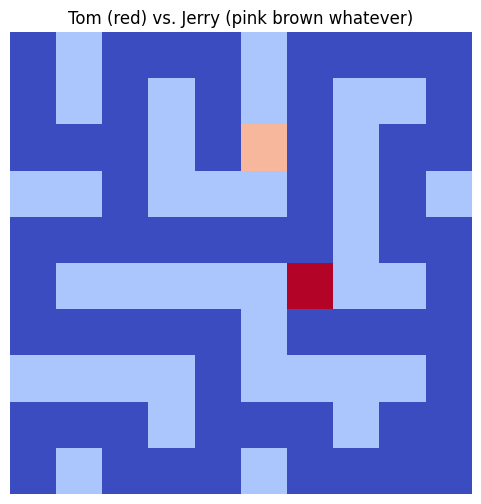

State: [2 5 5 6], Reward: 1


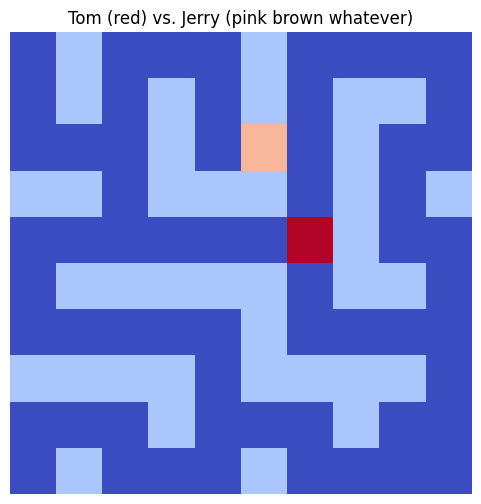

State: [2 5 4 6], Reward: 1


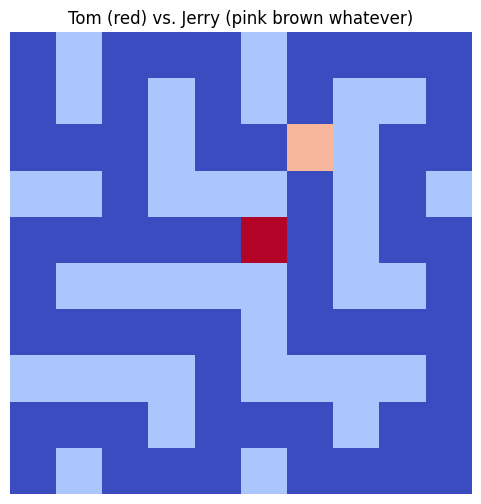

State: [2 6 4 5], Reward: 1


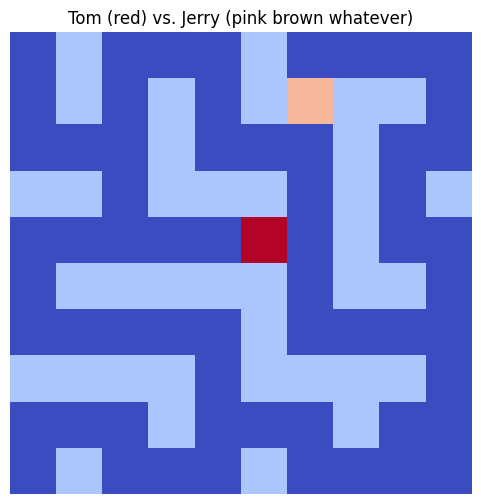

State: [1 6 4 5], Reward: 1


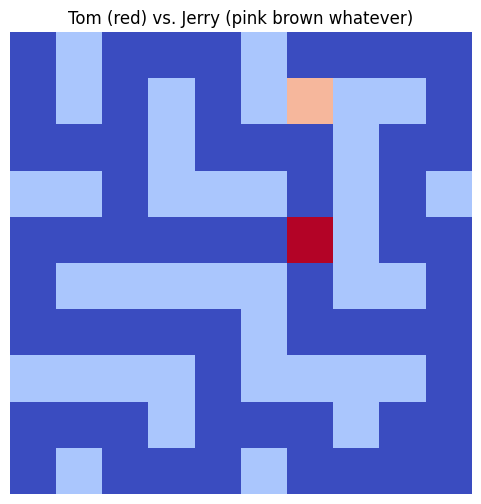

State: [1 6 4 6], Reward: 1


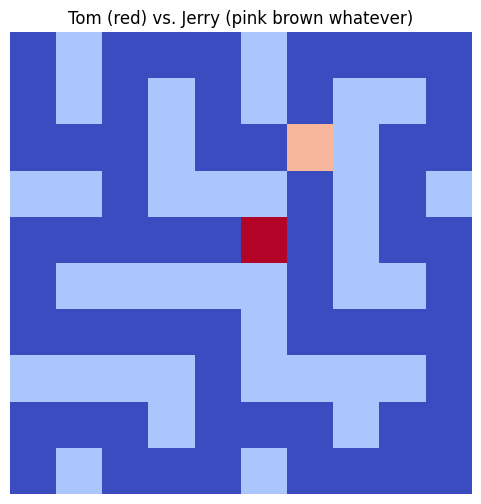

State: [2 6 4 5], Reward: 1


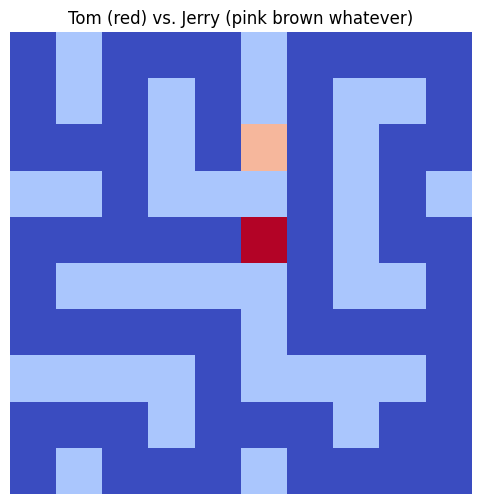

State: [2 5 4 5], Reward: 1


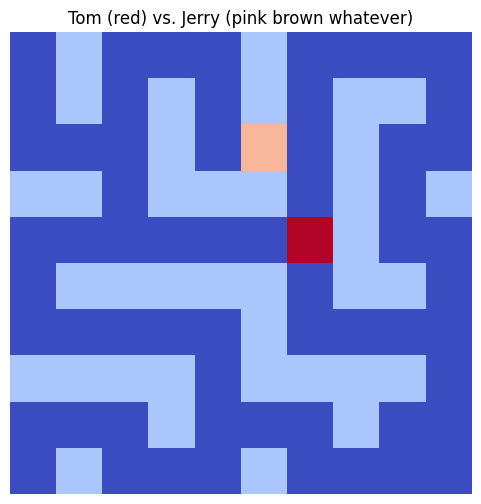

State: [2 5 4 6], Reward: 1


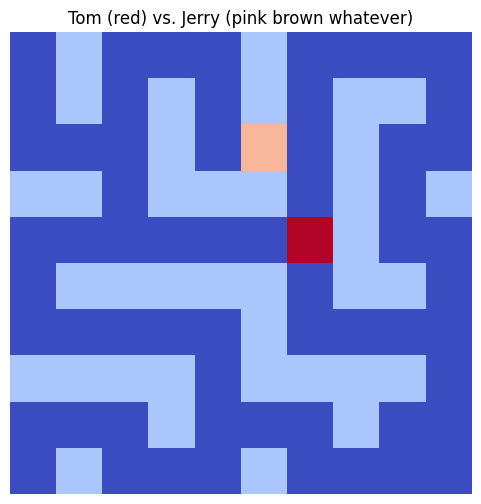

State: [2 5 4 6], Reward: 1


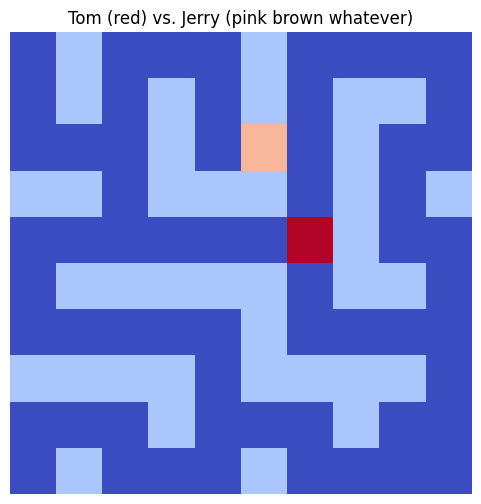

State: [2 5 4 6], Reward: 1


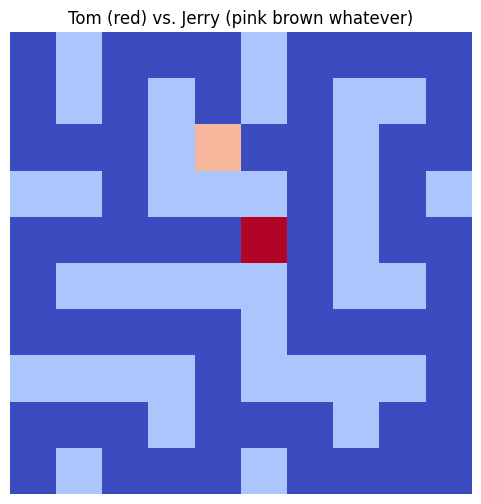

State: [2 4 4 5], Reward: 1


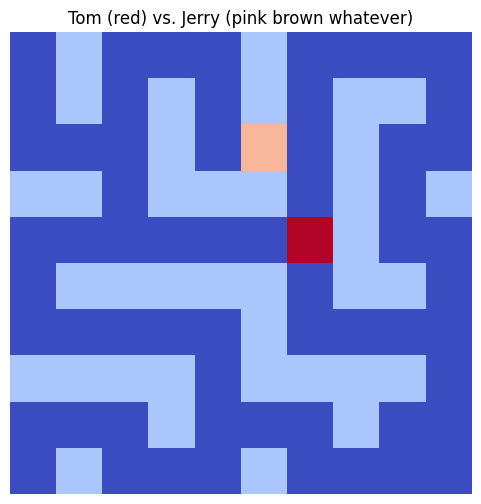

State: [2 5 4 6], Reward: 1


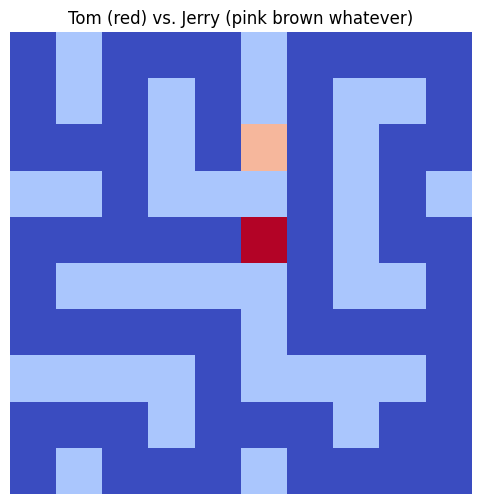

State: [2 5 4 5], Reward: 1


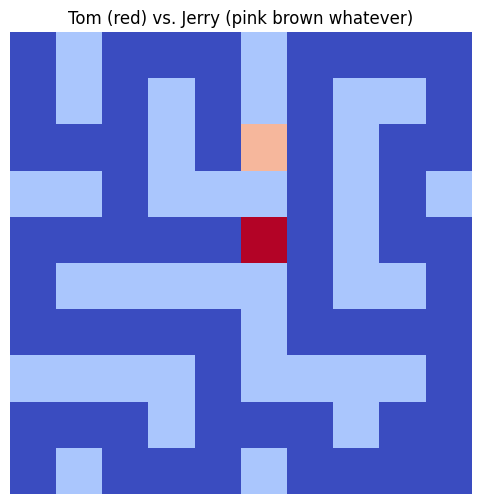

State: [2 5 4 5], Reward: 1


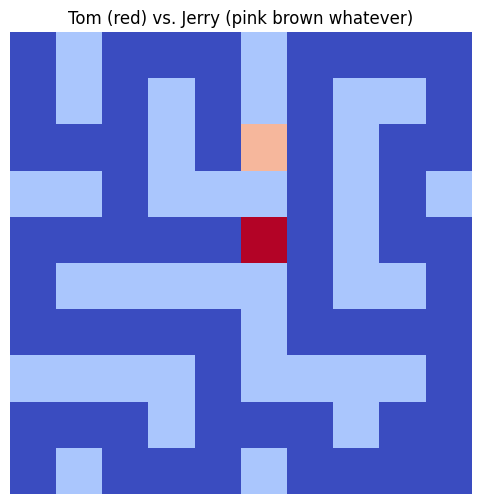

State: [2 5 4 5], Reward: 1


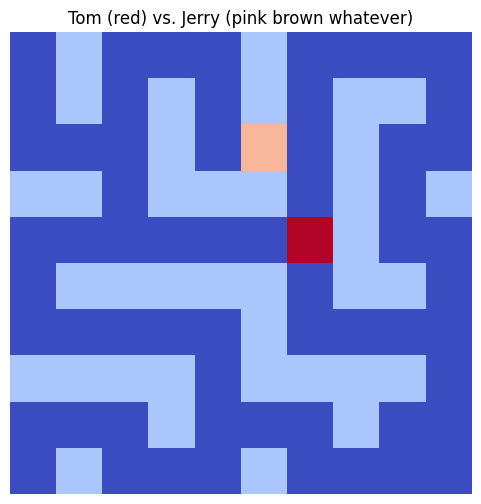

State: [2 5 4 6], Reward: 1


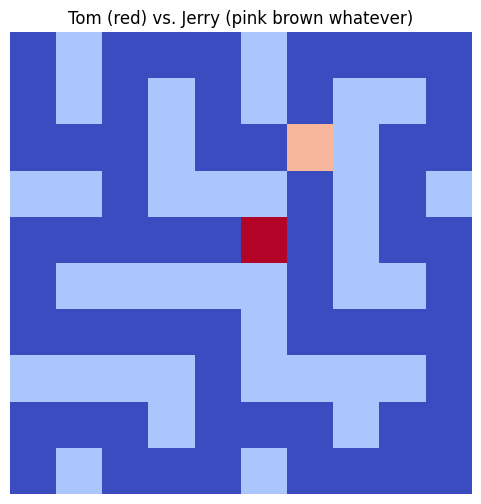

State: [2 6 4 5], Reward: 1


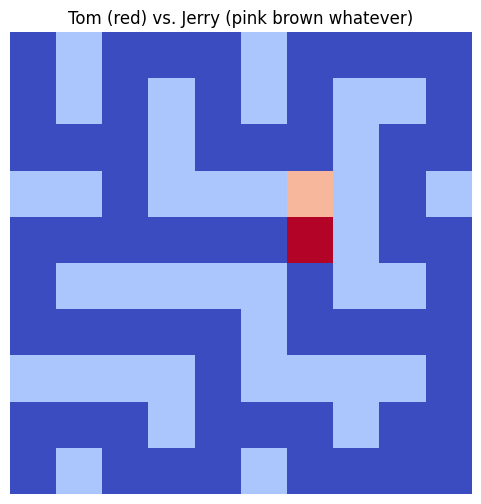

State: [3 6 4 6], Reward: 1


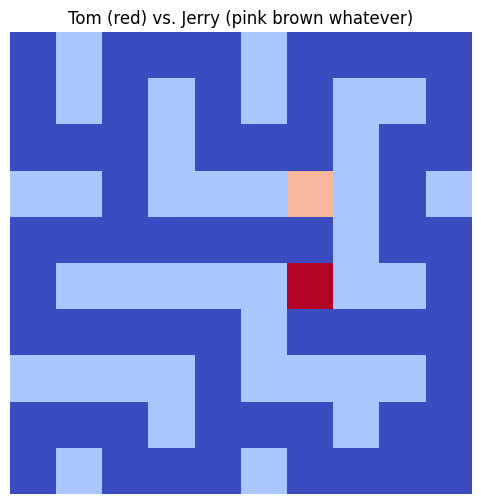

State: [3 6 5 6], Reward: 1


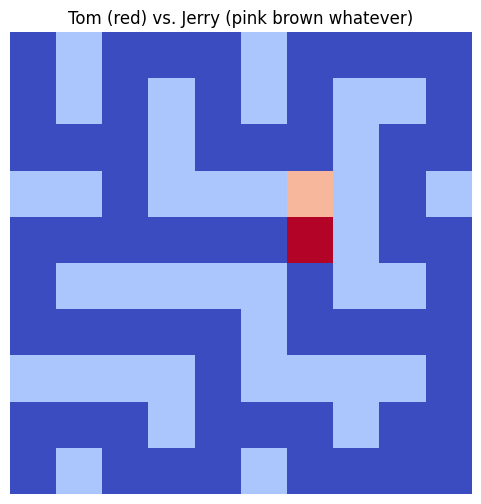

State: [3 6 4 6], Reward: 1


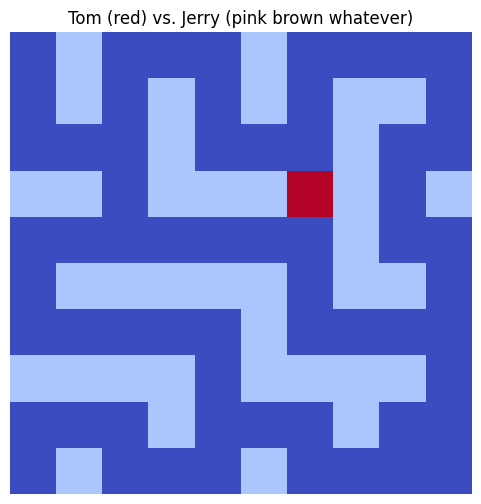

State: [3 6 3 6], Reward: -1
Game Over!


In [15]:
house = [
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
]

env = HunterEnv(house, mouse_start=(0, 0), cat_start=(len(house)-1, len(house)-1))

state = env.reset()
done = False

while not done:
    mouse_action = random.choice([0, 1, 2, 3])

    cat_action = random.choice([0, 1, 2, 3])

    state, reward, done, _ = env.step(mouse_action, cat_action)
    env.render()
    print(f"State: {state}, Reward: {reward}")

print("Game Over!")